In [ ]:
import numpy as np
import pandas as pd 
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Activation
from keras.optimizers import Optimizer
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical 
from keras import backend as K
import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE , chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import math
import time
from sklearn.metrics import mean_squared_error

**Data Preparation**

1. Step 1 
One flaw in the dataset I noticed is that, it contains question marks. So I  tried to remove this.




In [ ]:
#Step1a Preparing the training data
#https://www.geeksforgeeks.org/use-of-na_values-parameter-in-read_csv-function-of-pandas-in-python/
sample1 = 'adult.data'
sample2 = 'adult.test'
names = ('age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class')
#data_train = read_csv(filename1, names=names, index_col=0)
#data_test = read_csv(filename2, names=names)
question_mark_traindata = pd.read_csv(sample1,names= names, na_values=[' ?','?'])
question_mark_testdata = pd.read_csv(sample2, names= names, na_values=[' ?','?'])

In [ ]:
# To visualise the train data that has question marks in the categorical columns. Hence there are 32561 rows and 15 columns
#question_mark_traindata.shape
question_mark_traindata
#question_mark_traindata.describe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# To visualise the test data that has question marks in the categorical columns. Hence there are 16282 rows and 15 columns
#question_mark_testdata.shape
question_mark_testdata

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
# So dropping rows which has question_mark in the train dataset. We can see below that from 32561 rows, we have 30162 rows = 2399 rows with question marks are dropped 
train_data = question_mark_traindata.dropna()
train_data # train data is now cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# So dropping rows which has question_mark in the test dataset. We can see below that from 16282 rows, we have 15060 rows = 1222 rows with question marks are dropped 
test_data = question_mark_testdata.dropna()
test_data # test data is now cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


Step 2 -- Using Label Encoder

In [ ]:
#Step1b Now using Label Encoder on train dataset so that the categorical variables are converted into continuous variables. Label Encoder compares the data and assigns labels according to the comparision made.
labelencoder_X = LabelEncoder()
train_data1 = train_data.apply(labelencoder_X.fit_transform)
train_data1 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,15471,7,11,2,12,5,4,0,0,0,37,38,0
32557,23,2,7555,11,8,2,6,0,4,1,0,0,39,38,1
32558,41,2,7377,11,8,6,0,4,4,0,0,0,39,38,0
32559,5,2,12060,11,8,4,0,3,4,1,0,0,19,38,0


In [ ]:
#Now using Label Encoder on test dataset so that the categorical variables are converted into continuous variables. Label Encoder compares the data and assigns labels according to the comparision made.
labelencoder_Y = LabelEncoder()
test_data1 = test_data.apply(labelencoder_Y.fit_transform)
test_data1 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,8,2,8315,1,6,4,6,3,2,1,0,0,39,37,0
2,21,2,1754,11,8,2,4,0,4,1,0,0,49,37,0
3,11,1,10750,7,11,2,10,0,4,1,0,0,39,37,1
4,27,2,4780,15,9,2,6,0,2,1,87,0,39,37,1
6,17,2,7091,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16,2,8927,9,12,4,9,3,4,1,0,0,39,37,0
16277,22,2,7893,9,12,0,9,1,4,0,0,0,35,37,0
16279,21,2,11193,9,12,2,9,0,4,1,0,0,49,37,0
16280,27,2,1593,9,12,0,0,3,1,1,73,0,39,37,0


Step 3- Using One hot Encoding. Concluded not to use at too many features and will lead to the dimensionality problem.
https://stats.stackexchange.com/questions/371750/using-categorical-feature-as-both-a-continuous-feature-and-also-doing-one-hot-e

In [ ]:
# #Step 3 the columns are convered to 0s and 1s by using one hot encoder. With One hot encoding we cannot remove any features. So no filter, Wrapper or Embedded method needed. Also no need to even Scale the data.
# #onehotvector gives a feature for every categorical option. No Need to do Feature extraction and Feature selection when using one hot encoder.
# array = train_data1.values #first get the train data into arrays
# X_train = array[:, 0:14] #all rows of all columns except the last column which is a target variable
# Y_train = array[:, 14] # the last columns
# from sklearn.compose import ColumnTransformer


# ct = ColumnTransformer(
#     [('oh_enc', OneHotEncoder(sparse=False), [1, 3, 5, 6, 7, 8, 9, 13]),],  # the column numbers I want to apply this to
#     remainder='passthrough'  # This leaves the rest of my columns in place
# )
# X_traindata = ct.fit_transform(X_train)
# X_traindata

# #print(ct.fit_transform(X)) # Notice the output is a string
# Z_train = pd.DataFrame(X_traindata)
# Z_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0,2491.0,12.0,24.0,0.0,39.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,2727.0,12.0,0.0,0.0,12.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0,13188.0,8.0,0.0,0.0,39.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,14354.0,6.0,0.0,0.0,39.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,18120.0,12.0,0.0,0.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,15471.0,11.0,0.0,0.0,37.0
30158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,7555.0,8.0,0.0,0.0,39.0
30159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.0,7377.0,8.0,0.0,0.0,39.0
30160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,12060.0,8.0,0.0,0.0,19.0


Step 4 Using Minmax Scalar

In [ ]:
#Step 4a MinmaxScalar on Training dataset
X_train = train_data1.values[:, 0:14] #all rows of all columns except the last column which is a target variable
Y_train = train_data1.values[:, 14]
#rescaled data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X_train)
#summarize transformed data
set_printoptions(precision=3)
print(rescaledX)
M = pd.DataFrame(rescaledX) #M shows that train data has been scaled
M

[[0.31  0.833 0.123 ... 0.    0.419 0.95 ]
 [0.465 0.667 0.135 ... 0.    0.129 0.95 ]
 [0.296 0.333 0.651 ... 0.    0.419 0.95 ]
 ...
 [0.577 0.333 0.364 ... 0.    0.419 0.95 ]
 [0.07  0.333 0.595 ... 0.    0.204 0.95 ]
 [0.493 0.5   0.824 ... 0.    0.419 0.95 ]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.309859,0.833333,0.122939,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.205128,0.0,0.419355,0.95
1,0.464789,0.666667,0.134587,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.129032,0.95
2,0.295775,0.333333,0.650874,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.419355,0.95
3,0.507042,0.333333,0.708420,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.419355,0.95
4,0.154930,0.333333,0.894285,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.419355,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.140845,0.333333,0.763548,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.397849,0.95
30158,0.323944,0.333333,0.372865,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.419355,0.95
30159,0.577465,0.333333,0.364081,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.419355,0.95
30160,0.070423,0.333333,0.595203,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.204301,0.95


In [ ]:
#Step 4b MinmaxScalar on Testing dataset
X_test = test_data1.values[:, 0:14] #all rows of all columns except the last column which is a target variable
Y_test = test_data1.values[:, 14]
#rescaled data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledY = scaler.fit_transform(X_test)
#summarize transformed data
set_printoptions(precision=3)
print(rescaledY)
N = pd.DataFrame(rescaledY) #M shows that test data has been scaled
N

[[0.111 0.333 0.698 ... 0.    0.443 0.949]
 [0.292 0.333 0.147 ... 0.    0.557 0.949]
 [0.153 0.167 0.902 ... 0.    0.443 0.949]
 ...
 [0.292 0.333 0.94  ... 0.    0.557 0.949]
 [0.375 0.333 0.134 ... 0.    0.443 0.949]
 [0.25  0.5   0.509 ... 0.    0.67  0.949]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.111111,0.333333,0.698036,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.443182,0.948718
1,0.291667,0.333333,0.147246,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718
2,0.152778,0.166667,0.902451,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.443182,0.948718
3,0.375000,0.333333,0.401276,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.798165,0.0,0.443182,0.948718
4,0.236111,0.333333,0.595282,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.329545,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.222222,0.333333,0.749412,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.443182,0.948718
15056,0.305556,0.333333,0.662609,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.397727,0.948718
15057,0.291667,0.333333,0.939641,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718
15058,0.375000,0.333333,0.133731,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.669725,0.0,0.443182,0.948718


Step 5 Using the Feature Selection(FS) Methods
Step 5a FS - Wraper Method - RFE i.e Recursive Feature Elimination

In [ ]:
#Step 5a Wrapper Method Applied on the training dataset
print('Recursive Feature Elimination')
print()
wrapper_model = LogisticRegression(solver='liblinear') 
wrapper_model = RFE(wrapper_model, 10) 
wrapper_model_train = wrapper_model.fit(rescaledX,Y_train)
wrapper_model_train_features = wrapper_model_train.transform(rescaledX)
print(wrapper_model_train_features)
print()
print(wrapper_model_train_features.shape)
print('\n')

Recursive Feature Elimination

[[0.31  0.833 0.8   ... 0.205 0.    0.419]
 [0.465 0.667 0.8   ... 0.    0.    0.129]
 [0.296 0.333 0.533 ... 0.    0.    0.419]
 ...
 [0.577 0.333 0.533 ... 0.    0.    0.419]
 [0.07  0.333 0.533 ... 0.    0.    0.204]
 [0.493 0.5   0.533 ... 0.915 0.    0.419]]

(30162, 10)




In [ ]:
#Step 5a Wrapper Method Applied on the testing dataset
print('Recursive Feature Elimination')
print()
wrapper_model = LogisticRegression(solver='liblinear') 
wrapper_model = RFE(wrapper_model, 10) 
wrapper_model_test = wrapper_model.fit(rescaledY,Y_test)
wrapper_model_test_features = wrapper_model_test.transform(rescaledY)
print(wrapper_model_test_features)
print()
print(wrapper_model_test_features.shape)
print('\n')

Recursive Feature Elimination

[[0.111 0.333 0.4   ... 0.    0.    0.443]
 [0.292 0.333 0.533 ... 0.    0.    0.557]
 [0.153 0.167 0.733 ... 0.    0.    0.443]
 ...
 [0.292 0.333 0.8   ... 0.    0.    0.557]
 [0.375 0.333 0.8   ... 0.67  0.    0.443]
 [0.25  0.5   0.8   ... 0.    0.    0.67 ]]

(15060, 10)




Step 5b Using Feature Selection - Embedded Method i.e ExtraTreesClassifier

In [ ]:
#Step 5b Embedded Method Applied on the training dataset
print('ExtraTreesClassifier')
print()
embedded_model = ExtraTreesClassifier(n_estimators=10)
embedded_model_train = embedded_model.fit(rescaledX,Y_train)
clf_emb_model = SelectFromModel(embedded_model_train , prefit=True)
embedded_model_train_features = clf_emb_model.transform(rescaledX)
print(embedded_model_train_features)
print()
print(embedded_model_train_features.shape)
print('\n')

ExtraTreesClassifier

[[0.31  0.123 0.8   ... 0.2   0.205 0.419]
 [0.465 0.135 0.8   ... 0.    0.    0.129]
 [0.296 0.651 0.533 ... 0.2   0.    0.419]
 ...
 [0.577 0.364 0.533 ... 0.8   0.    0.419]
 [0.07  0.595 0.533 ... 0.6   0.    0.204]
 [0.493 0.824 0.533 ... 1.    0.915 0.419]]

(30162, 7)




In [ ]:
#Step 5b Embedded Method Applied on the testing dataset
print('ExtraTreesClassifier')
print()
embedded_model = ExtraTreesClassifier(n_estimators=10)
embedded_model_test = embedded_model.fit(rescaledY,Y_test)
clf_emb_model = SelectFromModel(embedded_model_test , prefit=True)
embedded_model_test_features = clf_emb_model.transform(rescaledY)
print(embedded_model_test_features)
print()
print(embedded_model_test_features.shape)
print('\n')

ExtraTreesClassifier

[[0.111 0.698 0.4   ... 0.462 0.    0.443]
 [0.292 0.147 0.533 ... 0.308 0.    0.557]
 [0.153 0.902 0.733 ... 0.769 0.    0.443]
 ...
 [0.292 0.94  0.8   ... 0.692 0.    0.557]
 [0.375 0.134 0.8   ... 0.    0.67  0.443]
 [0.25  0.509 0.8   ... 0.231 0.    0.67 ]]

(15060, 7)




Step 5c Using Filter Method - SelectKbest

In [ ]:
#Step 5c Filter Method Applied on the training dataset
print('selectKBest')
print()
selectKbest_model = SelectKBest(score_func=chi2, k=10)
fs = selectKbest_model.fit(rescaledX, Y_train)
# summarize scores
set_printoptions(precision=3)
#print(fit.score_)
selectKbest_train_features = fs.transform(rescaledX)
# summarize selected features
print(selectKbest_train_features)
print()
print(selectKbest_train_features.shape)
print('\n')

selectKBest

[[0.31  0.6   0.8   ... 0.205 0.    0.419]
 [0.465 0.6   0.8   ... 0.    0.    0.129]
 [0.296 0.733 0.533 ... 0.    0.    0.419]
 ...
 [0.577 0.733 0.533 ... 0.    0.    0.419]
 [0.07  0.733 0.533 ... 0.    0.    0.204]
 [0.493 0.733 0.533 ... 0.915 0.    0.419]]

(30162, 10)




In [ ]:
#Step 5c Filter Method Applied on the testing dataset
print('selectKBest')
print()
selectKbest_model = SelectKBest(score_func=chi2, k=10)
fs = selectKbest_model.fit(rescaledY, Y_test)
# summarize scores
set_printoptions(precision=3)
#print(fit.score_)
selectKbest_test_features = fs.transform(rescaledY)
# summarize selected features
print(selectKbest_test_features)
print()
print(selectKbest_test_features.shape)
print('\n')

selectKBest

[[0.111 0.067 0.4   ... 0.    0.    0.443]
 [0.292 0.733 0.533 ... 0.    0.    0.557]
 [0.153 0.467 0.733 ... 0.    0.    0.443]
 ...
 [0.292 0.6   0.8   ... 0.    0.    0.557]
 [0.375 0.6   0.8   ... 0.67  0.    0.443]
 [0.25  0.6   0.8   ... 0.    0.    0.67 ]]

(15060, 10)




Step 6 Applying Feature Extraction Principal Component Analysis (PCA) Technique each on all the feature selection inorder to prepare the data

In [ ]:
#Step 6a PCA on Wrapper Method Applied on the training dataset
print('PCA on Wrapper Method (Recursive Feature Elimination)')
print()
pca = PCA(n_components=6, random_state = 7) 
pca_train = pca.fit(wrapper_model_train_features) 
pca_wrapper_train_features = pca_train.transform(wrapper_model_train_features)
print(pca_wrapper_train_features)
print()
print(pca_wrapper_train_features.shape)
print('\n')

#Step 6a PCA on Wrapper Method Applied on the testing dataset
pca_test = pca.fit(wrapper_model_test_features) 
pca_wrapper_test_features = pca_test.transform(wrapper_model_test_features)
print(pca_wrapper_test_features)
print()
print(pca_wrapper_test_features.shape)
print('\n')

PCA on Wrapper Method (Recursive Feature Elimination)

[[-0.324 -0.174 -0.125 -0.1    0.26   0.051]
 [-0.427  0.135 -0.064 -0.049 -0.031  0.061]
 [-0.361  0.211  0.312 -0.064 -0.145 -0.041]
 ...
 [ 0.87  -0.288 -0.21  -0.107  0.097  0.377]
 [-0.077 -0.53   0.19  -0.156  0.01  -0.002]
 [ 0.86   0.222  0.327 -0.105  0.853  0.331]]

(30162, 6)


[[-0.07  -0.575  0.238  0.341 -0.037  0.038]
 [-0.432  0.067 -0.03  -0.052 -0.115 -0.032]
 [-0.413  0.025 -0.036 -0.06  -0.072 -0.276]
 ...
 [-0.435  0.101 -0.049 -0.051 -0.027 -0.174]
 [-0.174  0.113  0.613  0.692  0.594 -0.076]
 [-0.445  0.105 -0.05  -0.067 -0.014 -0.171]]

(15060, 6)




In [ ]:
#Step 6b PCA on Embedded Method Applied on the training dataset
print('PCA on Embedded Method (ExtraTreesClassifier)')
print()
pca_train = pca.fit(embedded_model_train_features) 
pca_embedded_train_features = pca_train.transform(embedded_model_train_features)
print(pca_embedded_train_features)
print()
print(pca_embedded_train_features.shape)
print('\n')

#Step 6b PCA on Embedded Method Applied on the testing dataset
pca_test = pca.fit(embedded_model_test_features) 
pca_embedded_test_features = pca_test.transform(embedded_model_test_features)
print(pca_embedded_test_features)
print()
print(pca_embedded_test_features.shape)
print('\n')

PCA on Embedded Method (ExtraTreesClassifier)

[[ 0.045 -0.47  -0.35   0.174 -0.134 -0.099]
 [-0.193 -0.325 -0.335 -0.035  0.041 -0.155]
 [-0.024 -0.09   0.178 -0.081  0.024  0.039]
 ...
 [ 0.588 -0.273 -0.166  0.096  0.332 -0.083]
 [ 0.538 -0.275  0.114 -0.073 -0.131  0.074]
 [ 0.623  0.017  0.266  0.943  0.172  0.282]]

(30162, 6)


[[-0.03  -0.298 -0.232 -0.073  0.008  0.165]
 [-0.142  0.355 -0.021 -0.095 -0.023  0.046]
 [ 0.296 -0.403  0.159 -0.064 -0.179 -0.047]
 ...
 [ 0.226 -0.406  0.235 -0.006 -0.105 -0.175]
 [-0.405  0.527  0.422  0.502 -0.191  0.156]
 [-0.213  0.026  0.114  0.01  -0.183 -0.181]]

(15060, 6)




In [ ]:
#Step 6c PCA on Filter Method Applied on the training dataset
print('PCA on Filter Method (selectKBest)')
print()
pca_train = pca.fit(selectKbest_train_features) 
pca_selectKbest_train_features = pca_train.transform(selectKbest_train_features)
print(pca_selectKbest_train_features)
print()
print(pca_selectKbest_train_features.shape)
print('\n')

#Step 6c PCA on Filter Method Applied on the testing dataset
pca_test = pca.fit(selectKbest_test_features) 
pca_selectKbest_test_features = pca_test.transform(selectKbest_test_features)
print(pca_selectKbest_test_features)
print()
print(pca_selectKbest_test_features.shape)
print('\n')

PCA on Filter Method (selectKBest)

[[-0.281 -0.429  0.204 -0.147 -0.126  0.241]
 [-0.401 -0.244 -0.036  0.103 -0.077 -0.036]
 [-0.353 -0.137 -0.147  0.151  0.301 -0.141]
 ...
 [ 0.9   -0.372  0.259 -0.222 -0.213  0.126]
 [-0.047 -0.426  0.448 -0.36   0.191  0.005]
 [ 0.882 -0.197 -0.166  0.082  0.343  0.883]]

(30162, 6)


[[-0.099 -0.008  0.805  0.156  0.182  0.075]
 [-0.421 -0.179 -0.065  0.028 -0.037 -0.107]
 [-0.429  0.302  0.087  0.137 -0.03  -0.078]
 ...
 [-0.443  0.225 -0.058  0.069 -0.037 -0.058]
 [-0.189 -0.463 -0.153  0.121  0.554  0.644]
 [-0.428 -0.234 -0.062  0.058 -0.052 -0.044]]

(15060, 6)




Step 7 Class Wame is used as an optimiser inplace of stochastic gradient descent(adam)-- We will see which dataset performs best on the Neural Network that uses Wame -- This is done to hypertune the parameters for the model

In [ ]:
#Step 7a using WAME
from tensorflow.keras.optimizers import Optimizer, RMSprop
from tensorflow.keras import backend as K
import numpy as np
if K.backend() == 'tensorflow':
  import tensorflow as tf

class WAME(Optimizer):#Creating a custom optimiser WAME

    def __init__(self, learning_rate=0.001, alpha_1 = 0.9, alpha_2 = 0.999,                  # this is the constructor of class WAME. It creates the optimiser.
                 epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                 zeta_min=1e-2, zeta_max=1e2, alpha_a=0.9,
                 **kwargs):#3 alpha
        
        super(WAME, self).__init__(**kwargs)
        self.__dict__.update(locals())
        self.iterations = K.variable(0)
        self.learning_rate = K.variable(learning_rate, name='learning_rate')
        self.alpha_1 = K.variable(alpha_1)#3 alpha
        self.alpha_2 = K.variable(alpha_2)#2
        self.alpha_a = K.variable(alpha_a)#1
        #self.zeta = K.variable(zeta)
        self.decay = K.variable(decay)
        self.eta_plus = K.variable(eta_plus)
        self.eta_minus = K.variable(eta_minus)
        self.zeta_min = zeta_min
        self.zeta_max = zeta_max
        self.inital_decay = decay
    #@K.symbolic
    def get_updates(self, params, constraints, loss): # This update method has everything betweem line 4 and 12 of the algorithm i.e the for loop given in the paper WAME
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]

        lr = self.lr
        if self.inital_decay > 0:
            lr *= (1. / (1. + self.decay * self.iterations))

        t = self.iterations + 1
        lr_t = lr * K.sqrt(1. - K.pow(self.alpha_2, t)) / (1. - K.pow(self.alpha_1, t))

        shapes = [K.get_variable_shape(p) for p in params]
        prev_grads = [K.zeros(shape) for shape in shapes] 
        prev_param = [K.zeros(shape) for shape in shapes]
        ms = [K.zeros(shape) for shape in shapes]
        vs = [K.zeros(shape) for shape in shapes]
        accs = [K.ones(shape) for shape in shapes]
        acc_ms = [K.ones(shape) for shape in shapes]
        acc_vs = [K.ones(shape) for shape in shapes]
        self.weights = [self.iterations] + ms + vs


        for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
                acc_ms, acc_vs, prev_grads, prev_param):

            change = pg * g  # This is line four and six
            change_below_zero = K.less(change,0.) #boolean true or false
            change_above_zero = K.greater(change,0.) #boolean true or false
            a_t = K.switch(
                change_below_zero, # switch statement to jump to line 6
                a * self.eta_minus, # otherwise use line 7
                K.switch(change_above_zero, a * self.eta_plus, a) # if line 4 is true go to line 5, otheriwse leave a as it was
            )
            a_clipped = K.clip(a_t, self.eta_min, self.eta_max) #end of line 5 and 7 i.e min and max value of eta
            v_t = (self.alpha_2 * v) + (1. - self.alpha_2) * K.square(g) # this is line 9
            am_t = (self.alpha_a * am) + (1. - self.alpha_a) * a_clipped  # line 10 
            a_rate = a_clipped / am_t                                     #line 11 i.e am_t == θij(t) as given in the paper
            p_t = p - lr_t * a_rate * g / (K.sqrt(v_t) + self.epsilon)    # line 12

            new_p = p_t 
            #apply constraints
            if p in constraints:
              c = constraints[p]
              new_p = c(new_p)

            self.updates.append(K.update(v, v_t))
            self.updates.append(K.update(p, new_p))
            self.updates.append(K.update(pg, p))
            self.updates.append(K.update(a, a_t))
            self.updates.append(K.update(am, am_t))
            self.updates.append(K.update(pp, p))
        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr)),
                  'alpha_1': float(K.get_value(self.alpha_1)),
                  'alpha_2': float(K.get_value(self.alpha_2)),
                  'alpha_a': float(K.get_value(self.alpha_a)),
                  'eta_plus': float(K.get_value(self.eta_plus)),
                  'eta_minus': float(K.get_value(self.eta_minus)),
                  'zeta_min': float(self.zeta_min),
                  'zeta_max': float(self.zeta_max),
                  'epsilon': self.epsilon}
        base_config = super(WAME, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

opt = WAME(name="WAME")

Step 7b -- Just checking the model is able to use the WAME class

In [ ]:
#pca with Wrapper dataset
#i will see which dataset gives better result on this neural network
from tensorflow.python.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]
#regularizers_choice =  [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001), regularizers.l1(0.01), regularizers.l1(0.001), regularizers.l1(0.0001)]

#One hidden layer used on Wrapper dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  #mlp_model.add(Dense(20, activation='relu'))
  #mlp_model.add(Dense(30, activation='relu'))               #six hidden layers
  #mlp_model.add(Dense(40, activation='relu'))
  #mlp_model.add(Dense(45, activation='relu'))
  #mlp_model.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# create model
model_keras = KerasClassifier(build_fn=creating_model, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_wrapper_train_features, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.838804 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME'}


In [ ]:
# pca with Embedded dataset. This dataset is chosen by K fold analysis in step 8 with 6 hidden layers
#i will see which dataset gives better result on this neural network
from tensorflow.python.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]
#regularizers_choice =  [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001), regularizers.l1(0.01), regularizers.l1(0.001), regularizers.l1(0.0001)]

#One hidden layer used on Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  #mlp_model.add(Dense(20, activation='relu'))
  #mlp_model.add(Dense(30, activation='relu'))               #six hidden layers
  #mlp_model.add(Dense(40, activation='relu'))
  #mlp_model.add(Dense(45, activation='relu'))
  #mlp_model.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# create model
model_keras = KerasClassifier(build_fn=creating_model, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_embedded_train_features, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.839832 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME'}


In [ ]:
# # pca with Filter dataset
#i will see which dataset gives better result on this neural network
from tensorflow.python.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]
#regularizers_choice =  [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001), regularizers.l1(0.01), regularizers.l1(0.001), regularizers.l1(0.0001)]

#One hidden layer used on Filter dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  #mlp_model.add(Dense(20, activation='relu'))
  #mlp_model.add(Dense(30, activation='relu'))               #six hidden layers
  #mlp_model.add(Dense(40, activation='relu'))
  #mlp_model.add(Dense(45, activation='relu'))
  #mlp_model.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# create model
model_keras = KerasClassifier(build_fn=creating_model, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_selectKbest_train_features, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.827233 using {'batch_size': 20, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME'}


roughly estimate without using K fold to analyse which dataset to use for the model

pca_wrapper_train_features ---- 0.838804 

pca_embedded_train_features ----- 0.839832   ---- so i chose pca with embedded method dataset for slightly better performance

pca_selectKbest_train_features ---- 0.827233

STEP 8 KFOLD IS USED TO COMPARE WHICH MODEL FITS BEST ON WHICH DATASET
Comparing which dataset(i.e the one obtained from pca with filter, wrapper or embedded method)performs best on which model, how many hidden layers to be used. 

Epoch 1/10
1358/1358 [==============================] - 2s 812us/step - loss: 0.1706 - accuracy: 0.7687
Epoch 2/10
1358/1358 [==============================] - 1s 813us/step - loss: 0.1236 - accuracy: 0.8223
Epoch 3/10
1358/1358 [==============================] - 1s 835us/step - loss: 0.1210 - accuracy: 0.8235
Epoch 4/10
1358/1358 [==============================] - 1s 804us/step - loss: 0.1189 - accuracy: 0.8239
Epoch 5/10
1358/1358 [==============================] - 1s 852us/step - loss: 0.1149 - accuracy: 0.8286
Epoch 6/10
1358/1358 [==============================] - 1s 853us/step - loss: 0.1142 - accuracy: 0.8329
Epoch 7/10
1358/1358 [==============================] - 1s 840us/step - loss: 0.1132 - accuracy: 0.8378
Epoch 8/10
1358/1358 [==============================] - 1s 843us/step - loss: 0.1125 - accuracy: 0.8361
Epoch 9/10
1358/1358 [==============================] - 1s 821us/step - loss: 0.1107 - accuracy: 0.8389
Epoch 10/10
1358/1358 [==============================] - 1s 909u

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



1358/1358 [==============================] - 2s 799us/step - loss: 0.1707 - accuracy: 0.7568
Epoch 2/10
1358/1358 [==============================] - 1s 776us/step - loss: 0.1237 - accuracy: 0.8227
Epoch 3/10
1358/1358 [==============================] - 1s 833us/step - loss: 0.1175 - accuracy: 0.8310
Epoch 4/10
1358/1358 [==============================] - 1s 827us/step - loss: 0.1157 - accuracy: 0.8313
Epoch 5/10
1358/1358 [==============================] - 1s 790us/step - loss: 0.1148 - accuracy: 0.8347
Epoch 6/10
1358/1358 [==============================] - 1s 818us/step - loss: 0.1122 - accuracy: 0.8367
Epoch 7/10
1358/1358 [==============================] - 1s 841us/step - loss: 0.1125 - accuracy: 0.8353
Epoch 8/10
1358/1358 [==============================] - 1s 840us/step - loss: 0.1135 - accuracy: 0.8357
Epoch 9/10
1358/1358 [==============================] - 1s 807us/step - loss: 0.1131 - accuracy: 0.8370
Epoch 10/10
1358/1358 [==============================] - 1s 804us/step - l

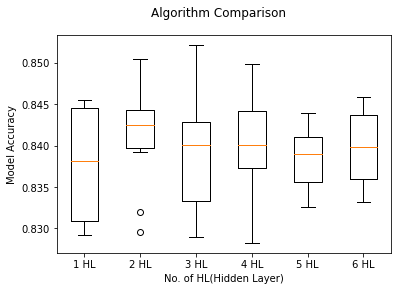

In [ ]:
#step8a for pca_Wrapper dataset 
#checking which algorithm to use for the pca data
# Compare Algorithms

#1 hidden layer used on pca_Wrapper dataset
def creating_model1(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #one hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #2 hidden layer used on pca_Wrapper dataset
def creating_model2(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))               #two hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #3 hidden layer used on pca_Wrapper dataset
def creating_model3(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #three hidden layers
  classifier.add(Dense(20, activation='relu'))               #three hidden layers
  classifier.add(Dense(30, activation='relu'))               #three hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier


  #4 hidden layer used on pca_Wrapper dataset
def creating_model4(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #four hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #5 hidden layer used on pca_Wrapper dataset
def creating_model5(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #five hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #6 hidden layer used on pca_Wrapper dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# prepare models
models = []
models.append(('1 HL', KerasClassifier(build_fn=creating_model1, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('2 HL', KerasClassifier(build_fn=creating_model2, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('3 HL', KerasClassifier(build_fn=creating_model3, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('4 HL', KerasClassifier(build_fn=creating_model4, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('5 HL', KerasClassifier(build_fn=creating_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('6 HL', KerasClassifier(build_fn=creating_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_wrapper_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of HL(Hidden Layer)')
plt.ylabel('Model Accuracy')
pyplot.show()
print('\n')
print('\n')

Epoch 1/10
1358/1358 [==============================] - 2s 799us/step - loss: 0.1601 - accuracy: 0.7798
Epoch 2/10
1358/1358 [==============================] - 1s 828us/step - loss: 0.1169 - accuracy: 0.8290
Epoch 3/10
1358/1358 [==============================] - 1s 851us/step - loss: 0.1143 - accuracy: 0.8319
Epoch 4/10
1358/1358 [==============================] - 1s 829us/step - loss: 0.1109 - accuracy: 0.8374
Epoch 5/10
1358/1358 [==============================] - 1s 814us/step - loss: 0.1127 - accuracy: 0.8342
Epoch 6/10
1358/1358 [==============================] - 1s 831us/step - loss: 0.1114 - accuracy: 0.8360
Epoch 7/10
1358/1358 [==============================] - 1s 830us/step - loss: 0.1115 - accuracy: 0.8381
Epoch 8/10
1358/1358 [==============================] - 1s 825us/step - loss: 0.1094 - accuracy: 0.8406
Epoch 9/10
1358/1358 [==============================] - 1s 805us/step - loss: 0.1105 - accuracy: 0.8363
Epoch 10/10
1358/1358 [==============================] - 1s 813u

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 823us/step - loss: 0.1545 - accuracy: 0.7840
Epoch 2/10
1358/1358 [==============================] - 1s 769us/step - loss: 0.1131 - accuracy: 0.8359
Epoch 3/10
1358/1358 [==============================] - 1s 798us/step - loss: 0.1088 - accuracy: 0.8419
Epoch 4/10
1358/1358 [==============================] - 1s 837us/step - loss: 0.1098 - accuracy: 0.8387
Epoch 5/10
1358/1358 [==============================] - 1s 844us/step - loss: 0.1119 - accuracy: 0.8368
Epoch 6/10
1358/1358 [==============================] - 1s 852us/step - loss: 0.1080 - accuracy: 0.8418
Epoch 7/10
1358/1358 [==============================] - 1s 817us/step - loss: 0.1086 - accuracy: 0.8397
Epoch 8/10
1358/1358 [==============================] - 1s 795us/step - loss: 0.1076 - accuracy: 0.8439
Epoch 9/10
1358/1358 [==============================] - 1s 837us/step - loss: 0.1108 - accuracy: 0.8379
Epoch 10/10
1358/1358 [==============================] - 1s 833u

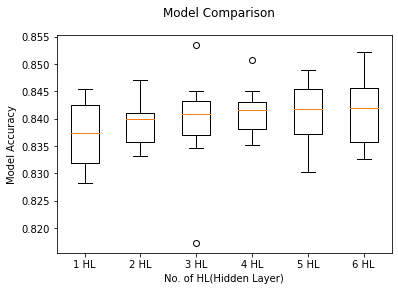

In [ ]:
#step8b for pca_Embedded dataset 
#checking which algorithm to use for the pca data
# Compare Algorithms

#1 hidden layer used on pca_Embedded dataset
def creating_model1(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #one hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #2 hidden layer used on pca_Embedded dataset
def creating_model2(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))              #two hidden layers
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #3 hidden layer used on pca_Embedded dataset
def creating_model3(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #three hidden layers
  classifier.add(Dense(20, activation='relu'))               #three hidden layers
  classifier.add(Dense(30, activation='relu'))               #three hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier


  #4 hidden layer used on pca_Embedded dataset
def creating_model4(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #four hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #5 hidden layer used on pca_Embedded dataset
def creating_model5(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #five hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #6 hidden layer used on pca_Embedded dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# prepare models
models = []
models.append(('1 HL', KerasClassifier(build_fn=creating_model1, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('2 HL', KerasClassifier(build_fn=creating_model2, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('3 HL', KerasClassifier(build_fn=creating_model3, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('4 HL', KerasClassifier(build_fn=creating_model4, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('5 HL', KerasClassifier(build_fn=creating_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('6 HL', KerasClassifier(build_fn=creating_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of HL(Hidden Layer)')
plt.ylabel('Model Accuracy')
pyplot.show()
print('\n')
print('\n')

Epoch 1/10
1358/1358 [==============================] - 1s 774us/step - loss: 0.1650 - accuracy: 0.7674
Epoch 2/10
1358/1358 [==============================] - 1s 793us/step - loss: 0.1310 - accuracy: 0.8059
Epoch 3/10
1358/1358 [==============================] - 1s 840us/step - loss: 0.1262 - accuracy: 0.8142
Epoch 4/10
1358/1358 [==============================] - 1s 825us/step - loss: 0.1237 - accuracy: 0.8154
Epoch 5/10
1358/1358 [==============================] - 1s 828us/step - loss: 0.1232 - accuracy: 0.8146
Epoch 6/10
1358/1358 [==============================] - 1s 814us/step - loss: 0.1206 - accuracy: 0.8205
Epoch 7/10
1358/1358 [==============================] - 1s 806us/step - loss: 0.1188 - accuracy: 0.8257
Epoch 8/10
1358/1358 [==============================] - 1s 797us/step - loss: 0.1177 - accuracy: 0.8288
Epoch 9/10
1358/1358 [==============================] - 1s 803us/step - loss: 0.1181 - accuracy: 0.8301
Epoch 10/10
1358/1358 [==============================] - 1s 825u

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 767us/step - loss: 0.1681 - accuracy: 0.7614
Epoch 2/10
1358/1358 [==============================] - 1s 831us/step - loss: 0.1287 - accuracy: 0.8092
Epoch 3/10
1358/1358 [==============================] - 1s 797us/step - loss: 0.1214 - accuracy: 0.8188
Epoch 4/10
1358/1358 [==============================] - 1s 804us/step - loss: 0.1215 - accuracy: 0.8171
Epoch 5/10
1358/1358 [==============================] - 1s 834us/step - loss: 0.1182 - accuracy: 0.8225
Epoch 6/10
1358/1358 [==============================] - 1s 810us/step - loss: 0.1161 - accuracy: 0.8264
Epoch 7/10
1358/1358 [==============================] - 1s 840us/step - loss: 0.1155 - accuracy: 0.8273
Epoch 8/10
1358/1358 [==============================] - 1s 835us/step - loss: 0.1201 - accuracy: 0.8241
Epoch 9/10
1358/1358 [==============================] - 1s 837us/step - loss: 0.1179 - accuracy: 0.8235
Epoch 10/10
1358/1358 [==============================] - 1s 839u

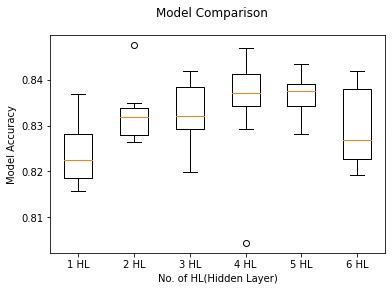

In [ ]:
#step8c for pca_Filter dataset 
#checking which algorithm to use for the pca data
# Compare Algorithms

#1 hidden layer used on pca_Filter dataset
def creating_model1(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #one hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #2 hidden layer used on pca_Filter dataset
def creating_model2(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))              #two hidden layers
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #3 hidden layer used on pca_Filter dataset
def creating_model3(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #three hidden layers
  classifier.add(Dense(20, activation='relu'))               #three hidden layers
  classifier.add(Dense(30, activation='relu'))               #three hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier


  #4 hidden layer used on pca_Filter dataset
def creating_model4(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #four hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #5 hidden layer used on pca_Filter dataset
def creating_model5(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #five hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #6 hidden layer used on pca_Filter dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# prepare models
models = []
models.append(('1 HL', KerasClassifier(build_fn=creating_model1, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('2 HL', KerasClassifier(build_fn=creating_model2, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('3 HL', KerasClassifier(build_fn=creating_model3, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('4 HL', KerasClassifier(build_fn=creating_model4, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('5 HL', KerasClassifier(build_fn=creating_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('6 HL', KerasClassifier(build_fn=creating_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_selectKbest_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of HL(Hidden Layer)')
plt.ylabel('Model Accuracy')
pyplot.show()
print('\n')
print('\n')

Step 9 Hypertuning the parameters Now

I chose pca_embedded dataset as it has high accuracy(around 85.0 to 85.5 % ) as shown in the graph with 6 hidden layer neural network model.

In [ ]:
# Step 9a Hypertuning the model parameter now
# pca with Embedded dataset. This dataset is chosen by K fold analysis with 6 hidden layers
#i will see which dataset gives better result on this neural network
from tensorflow.python.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
optimizers = ['WAME']#learning_rate=0.001
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]



#6 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# create model
model_keras = KerasClassifier(build_fn=creating_model, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_embedded_train_features, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.842484 using {'batch_size': 40, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME'}


In [ ]:
# Step 9B Hypertuning the LEARNING RATES AS WELL To see the best learning rate for the model
# pca with Embedded dataset. This dataset is chosen by K fold analysis with 6 hidden layers
#i will see which dataset gives better result on this neural network
from tensorflow.python.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
optimizers = ['WAME', 'WAME(learning_rate=0.01)', 'WAME(learning_rate=0.0001)', 'WAME(learning_rate=0.00001)'] # By default the learning rate is 0.001 in class WAME
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]



#6 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# create model
model_keras = KerasClassifier(build_fn=creating_model, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_embedded_train_features, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.841490 using {'batch_size': 40, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME(learning_rate=0.0001)'}


Step 10 Evaluating and Testing the result on Testing dataset now

In [ ]:
# the accuracy for the default learning rates 0.001 is 83%
#STEP 10 Testing 


#6 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 6 HIDDEN LAYERS', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')







Model :  ANN WITH 6 HIDDEN LAYERS
Epoch 1/10
755/755 [==============================] - 2s 1ms/step - loss: 0.1554 - accuracy: 0.7889
Epoch 2/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1224 - accuracy: 0.8228
Epoch 3/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1150 - accuracy: 0.8345
Epoch 4/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.8368
Epoch 5/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1115 - accuracy: 0.8373
Epoch 6/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1091 - accuracy: 0.8403
Epoch 7/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1082 - accuracy: 0.8416
Epoch 8/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.8449
Epoch 9/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.8398
Epoch 10/10
755/755 [==============================] - 1s 1ms/st

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.3474 


Time elapsed in seconds: 12.1596 


[[10162  1198]
 [ 1398  2302]]


              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11360
           1       0.66      0.62      0.64      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.76      0.76     15060
weighted avg       0.82      0.83      0.83     15060





In [ ]:
# the accuracy for the best hyperparameters with best learning rates 0.0001 is 83%. Hence when using the best hyperparameter the accuracy for the model is increased to 72% from 69%
#STEP 10 Testing 
#aCCURACY IS 83%

#6 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 6 HIDDEN LAYERS', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')



Model :  ANN WITH 6 HIDDEN LAYERS
Epoch 1/10
755/755 [==============================] - 2s 1ms/step - loss: 0.1525 - accuracy: 0.7871
Epoch 2/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1162 - accuracy: 0.8312
Epoch 3/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.8329
Epoch 4/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.8381
Epoch 5/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1104 - accuracy: 0.8387
Epoch 6/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1113 - accuracy: 0.8385
Epoch 7/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1082 - accuracy: 0.8420
Epoch 8/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1080 - accuracy: 0.8445
Epoch 9/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.8424
Epoch 10/10
755/755 [==============================] - 1s 1ms/st

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.3523 


Time elapsed in seconds: 12.2120 


[[10637   723]
 [ 1843  1857]]


              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11360
           1       0.72      0.50      0.59      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.72      0.74     15060
weighted avg       0.82      0.83      0.82     15060





Step 11 Some of the graphs to analyse

Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1654 - accuracy: 0.7877
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1197 - accuracy: 0.8298
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1144 - accuracy: 0.8325
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1111 - accuracy: 0.8384
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1106 - accuracy: 0.8386
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1092 - accuracy: 0.8396
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1113 - accuracy: 0.8379
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1096 - accuracy: 0.8403
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1103 - accuracy: 0.8385
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.109

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1644 - accuracy: 0.7745
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1250 - accuracy: 0.8212
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1188 - accuracy: 0.8294
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1148 - accuracy: 0.8342
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.8364
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1131 - accuracy: 0.8345
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1129 - accuracy: 0.8357
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.8390
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1133 - accuracy: 0.8339
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.111

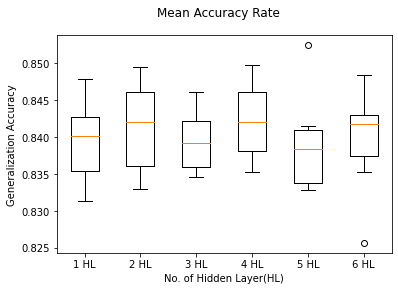

AttributeError: ignored

In [ ]:
#1 Graph of No of hidden layers vs Accuracy ans MSE of the Model
#hidden layer used on pca_Embedded dataset
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
def creating_model1(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #one hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #2 hidden layer used on pca_Embedded dataset
def creating_model2(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))              #two hidden layers
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #3 hidden layer used on pca_Embedded dataset
def creating_model3(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #three hidden layers
  classifier.add(Dense(20, activation='relu'))               #three hidden layers
  classifier.add(Dense(30, activation='relu'))               #three hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier


  #4 hidden layer used on pca_Embedded dataset
def creating_model4(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #four hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #5 hidden layer used on pca_Embedded dataset
def creating_model5(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #five hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #6 hidden layer used on pca_Embedded dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# prepare models
models = []
models.append(('1 HL', KerasClassifier(build_fn=creating_model1, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('2 HL', KerasClassifier(build_fn=creating_model2, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('3 HL', KerasClassifier(build_fn=creating_model3, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('4 HL', KerasClassifier(build_fn=creating_model4, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('5 HL', KerasClassifier(build_fn=creating_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('6 HL', KerasClassifier(build_fn=creating_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Accuracy Rate')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of Hidden Layer(HL)')
plt.ylabel('Generalization Accuracy')
pyplot.show()
print('\n')
print('\n')

#https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/
#Graphs of Mean Square Error
# def calc_train_error(pca_embedded_train_features, Y_train, model):
#     '''returns in-sample error for already fit model.'''
#     predictions = model.predict(pca_embedded_train_features)
#     mse = mean_squared_error(Y_train, predictions)
#     rmse = np.sqrt(mse)
#     return mse
    
# def calc_validation_error(pca_embedded_test_features, Y_test, model):
#     '''returns out-of-sample error for already fit model.'''
#     predictions = models.predict(pca_embedded_test_features)
#     mse = mean_squared_error(Y_test, predictions)
#     rmse = np.sqrt(mse)
#     return mse
    
# def calc_metrics(pca_embedded_train_features, Y_train, pca_embedded_test_features, Y_test, model):
#     '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
#     model.fit(pca_embedded_train_features, Y_train)
#     train_error = calc_train_error(pca_embedded_train_features, Y_train, model)
#     validation_error = calc_validation_error(pca_embedded_test_features, Y_test, model)
#     return train_error, validation_error



# # evaluate each model in turn
# results = []
# names = []
# scoring = calc_validation_error(pca_embedded_test_features, Y_test, models)
# for name, model in models:
#   kfold = KFold(n_splits=10, random_state=7,shuffle=True)
#   cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
#   results.append(cv_results)
#   names.append(name)
#   msg = "%s: %f (%f)" % (name, cv_results.calc_validation_error())
#   print(msg)
# # boxplot algorithm comparison
# fig = pyplot.figure()
# fig.suptitle('Mean Squared Error')
# ax = fig.add_subplot(111)
# pyplot.boxplot(results)
# ax.set_xticklabels(names)
# plt.xlabel('No. of Hidden Layer(HL)')
# plt.ylabel('Generalization Error Rate')
# pyplot.show()
# print('\n')
# print('\n')


Epoch 1/10
1358/1358 [==============================] - 2s 805us/step - loss: 0.1777 - accuracy: 0.7731
Epoch 2/10
1358/1358 [==============================] - 1s 809us/step - loss: 0.1199 - accuracy: 0.8296
Epoch 3/10
1358/1358 [==============================] - 1s 831us/step - loss: 0.1122 - accuracy: 0.8374
Epoch 4/10
1358/1358 [==============================] - 1s 802us/step - loss: 0.1125 - accuracy: 0.8378
Epoch 5/10
1358/1358 [==============================] - 1s 815us/step - loss: 0.1114 - accuracy: 0.8385
Epoch 6/10
1358/1358 [==============================] - 1s 805us/step - loss: 0.1092 - accuracy: 0.8426
Epoch 7/10
1358/1358 [==============================] - 1s 837us/step - loss: 0.1108 - accuracy: 0.8377
Epoch 8/10
1358/1358 [==============================] - 1s 798us/step - loss: 0.1090 - accuracy: 0.8417
Epoch 9/10
1358/1358 [==============================] - 1s 832us/step - loss: 0.1083 - accuracy: 0.8425
Epoch 10/10
151/151 [==============================] - 0s 805us/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 HL: 0.841489 (0.005149)
Epoch 1/10
1358/1358 [==============================] - 2s 876us/step - loss: 0.1674 - accuracy: 0.7612
Epoch 2/10
1358/1358 [==============================] - 1s 927us/step - loss: 0.1162 - accuracy: 0.8301
Epoch 3/10
1358/1358 [==============================] - 1s 917us/step - loss: 0.1125 - accuracy: 0.8337
Epoch 4/10
1358/1358 [==============================] - 1s 888us/step - loss: 0.1109 - accuracy: 0.8395
Epoch 5/10
1358/1358 [==============================] - 1s 914us/step - loss: 0.1111 - accuracy: 0.8384
Epoch 6/10
1358/1358 [==============================] - 1s 865us/step - loss: 0.1095 - accuracy: 0.8410
Epoch 7/10
1358/1358 [==============================] - 1s 888us/step - loss: 0.1093 - accuracy: 0.8414
Epoch 8/10
1358/1358 [==============================] - 1s 840us/step - loss: 0.1096 - accuracy: 0.8388
Epoch 9/10
1358/1358 [==============================] - 1s 865us/step - loss: 0.1096 - accuracy: 0.8415
Epoch 10/10
151/151 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2 HL: 0.837942 (0.004592)
Epoch 1/10
1358/1358 [==============================] - 2s 868us/step - loss: 0.1528 - accuracy: 0.7845
Epoch 2/10
1358/1358 [==============================] - 1s 880us/step - loss: 0.1117 - accuracy: 0.8370
Epoch 3/10
1358/1358 [==============================] - 1s 913us/step - loss: 0.1098 - accuracy: 0.8410
Epoch 4/10
1358/1358 [==============================] - 1s 982us/step - loss: 0.1095 - accuracy: 0.8385
Epoch 5/10
1358/1358 [==============================] - 1s 925us/step - loss: 0.1081 - accuracy: 0.8403
Epoch 6/10
1358/1358 [==============================] - 1s 913us/step - loss: 0.1079 - accuracy: 0.8432
Epoch 7/10
1358/1358 [==============================] - 1s 904us/step - loss: 0.1066 - accuracy: 0.8443
Epoch 8/10
1358/1358 [==============================] - 1s 967us/step - loss: 0.1100 - accuracy: 0.8384
Epoch 9/10
1358/1358 [==============================] - 1s 942us/step - loss: 0.1066 - accuracy: 0.8447
Epoch 10/10
151/151 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3 HL: 0.841158 (0.005585)
Epoch 1/10
1358/1358 [==============================] - 2s 960us/step - loss: 0.1387 - accuracy: 0.8043
Epoch 2/10
1358/1358 [==============================] - 1s 963us/step - loss: 0.1135 - accuracy: 0.8374
Epoch 3/10
1358/1358 [==============================] - 1s 922us/step - loss: 0.1131 - accuracy: 0.8355
Epoch 4/10
1358/1358 [==============================] - 1s 920us/step - loss: 0.1100 - accuracy: 0.8404
Epoch 5/10
1358/1358 [==============================] - 1s 927us/step - loss: 0.1092 - accuracy: 0.8416
Epoch 6/10
1358/1358 [==============================] - 1s 940us/step - loss: 0.1099 - accuracy: 0.8386
Epoch 7/10
1358/1358 [==============================] - 1s 909us/step - loss: 0.1096 - accuracy: 0.8394
Epoch 8/10
1358/1358 [==============================] - 1s 972us/step - loss: 0.1089 - accuracy: 0.8409
Epoch 9/10
1358/1358 [==============================] - 1s 954us/step - loss: 0.1081 - accuracy: 0.8428
Epoch 10/10
151/151 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4 HL: 0.839069 (0.005165)
Epoch 1/10
1358/1358 [==============================] - 2s 913us/step - loss: 0.1413 - accuracy: 0.7987
Epoch 2/10
1358/1358 [==============================] - 1s 927us/step - loss: 0.1119 - accuracy: 0.8374
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1100 - accuracy: 0.8392
Epoch 4/10
1358/1358 [==============================] - 1s 962us/step - loss: 0.1107 - accuracy: 0.8384
Epoch 5/10
1358/1358 [==============================] - 1s 984us/step - loss: 0.1082 - accuracy: 0.8439
Epoch 6/10
1358/1358 [==============================] - 1s 973us/step - loss: 0.1089 - accuracy: 0.8411
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1108 - accuracy: 0.8384
Epoch 8/10
1358/1358 [==============================] - 1s 976us/step - loss: 0.1083 - accuracy: 0.8411
Epoch 9/10
1358/1358 [==============================] - 1s 993us/step - loss: 0.1074 - accuracy: 0.8451
Epoch 10/10
151/151 [=====================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5 HL: 0.838074 (0.005657)
Epoch 1/10
1358/1358 [==============================] - 2s 950us/step - loss: 0.1418 - accuracy: 0.7995
Epoch 2/10
1358/1358 [==============================] - 1s 958us/step - loss: 0.1146 - accuracy: 0.8362
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.8395
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1127 - accuracy: 0.8374
Epoch 5/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1105 - accuracy: 0.8387
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.8392
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1093 - accuracy: 0.8419
Epoch 8/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1092 - accuracy: 0.8420
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1103 - accuracy: 0.8399
Epoch 10/10
151/151 [==============================]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


6 HL: 0.838638 (0.004879)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


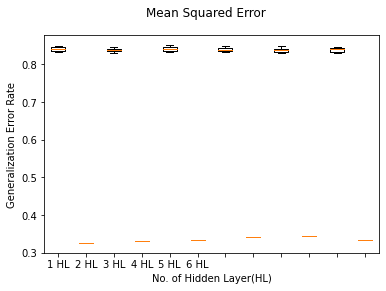

In [ ]:
#to take out mean square error
def creating_model1(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #one hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #2 hidden layer used on pca_Embedded dataset
def creating_model2(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))              #two hidden layers
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #3 hidden layer used on pca_Embedded dataset
def creating_model3(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #three hidden layers
  classifier.add(Dense(20, activation='relu'))               #three hidden layers
  classifier.add(Dense(30, activation='relu'))               #three hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier


  #4 hidden layer used on pca_Embedded dataset
def creating_model4(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #four hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #5 hidden layer used on pca_Embedded dataset
def creating_model5(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #five hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #6 hidden layer used on pca_Embedded dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model

# prepare models
models = []
models.append(('1 HL', KerasClassifier(build_fn=creating_model1, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('2 HL', KerasClassifier(build_fn=creating_model2, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('3 HL', KerasClassifier(build_fn=creating_model3, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('4 HL', KerasClassifier(build_fn=creating_model4, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('5 HL', KerasClassifier(build_fn=creating_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('6 HL', KerasClassifier(build_fn=creating_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))

results = []
names=[]
for name, model in models:
   kfold = KFold(n_splits=10, random_state=7,shuffle=True)
   cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold)
   results.append(cv_results)
   model.fit(pca_embedded_train_features, Y_train)
   y_pred = model.predict(pca_embedded_test_features)
   #predictions = models.predict(pca_embedded_test_features)
   mse = mean_squared_error(Y_test,  y_pred)
   results.append(mse)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
  # msg = "%s: " % (name)
  # print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Squared Error')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of Hidden Layer(HL)')
plt.ylabel('Generalization Error Rate')
pyplot.show()
print('\n')
print('\n')
  
  

Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1701 - accuracy: 0.7741
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1191 - accuracy: 0.8290
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1139 - accuracy: 0.8363
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1152 - accuracy: 0.8298
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1108 - accuracy: 0.8383
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1113 - accuracy: 0.8359
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1100 - accuracy: 0.8394
Epoch 8/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1104 - accuracy: 0.8394
Epoch 9/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.8389
Epoch 10/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.109

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1651 - accuracy: 0.7797
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1235 - accuracy: 0.8255
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1172 - accuracy: 0.8290
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1141 - accuracy: 0.8301
Epoch 5/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1157 - accuracy: 0.8289
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.8335
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.8354
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1130 - accuracy: 0.8341
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1119 - accuracy: 0.8348
Epoch 10/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.110

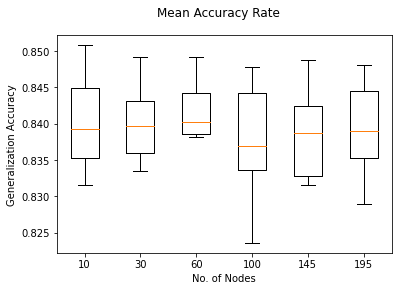





Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1656 - accuracy: 0.7609
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1243 - accuracy: 0.8259
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1168 - accuracy: 0.8313
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.8366
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1125 - accuracy: 0.8350
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1121 - accuracy: 0.8345
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1108 - accuracy: 0.8367
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1111 - accuracy: 0.8390
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1090 - accuracy: 0.8393
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1696 - accuracy: 0.7711
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1257 - accuracy: 0.8280
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1202 - accuracy: 0.8319
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1148 - accuracy: 0.8324
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1124 - accuracy: 0.8368
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1142 - accuracy: 0.8311
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1103 - accuracy: 0.8401
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1105 - accuracy: 0.8392
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1091 - accuracy: 0.8381
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.110

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1521 - accuracy: 0.7983
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1243 - accuracy: 0.8279
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1208 - accuracy: 0.8304
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1190 - accuracy: 0.8302
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1166 - accuracy: 0.8335
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1154 - accuracy: 0.8325
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1147 - accuracy: 0.8343
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1157 - accuracy: 0.8316
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1126 - accuracy: 0.8344
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.112

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1538 - accuracy: 0.7819
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1162 - accuracy: 0.8319
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1118 - accuracy: 0.8378
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1120 - accuracy: 0.8362
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1089 - accuracy: 0.8416
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1110 - accuracy: 0.8347
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1117 - accuracy: 0.8363
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1084 - accuracy: 0.8406
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1098 - accuracy: 0.8405
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.108

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1600 - accuracy: 0.7732
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1173 - accuracy: 0.8299
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1110 - accuracy: 0.8369
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1121 - accuracy: 0.8382
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1107 - accuracy: 0.8390
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1118 - accuracy: 0.8349
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1100 - accuracy: 0.8407
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1074 - accuracy: 0.8455
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1075 - accuracy: 0.8428
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.108

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 3s 1ms/step - loss: 0.1429 - accuracy: 0.7979
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1115 - accuracy: 0.8387
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1106 - accuracy: 0.8360
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1114 - accuracy: 0.8347
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1093 - accuracy: 0.8411
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1103 - accuracy: 0.8373
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1100 - accuracy: 0.8371
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1070 - accuracy: 0.8413
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1083 - accuracy: 0.8430
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.106

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 3s 1ms/step - loss: 0.1442 - accuracy: 0.7986
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1188 - accuracy: 0.8297
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1144 - accuracy: 0.8347
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1120 - accuracy: 0.8379
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1105 - accuracy: 0.8404
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1110 - accuracy: 0.8380
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1102 - accuracy: 0.8438
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1094 - accuracy: 0.8422
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1090 - accuracy: 0.8435
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.111

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


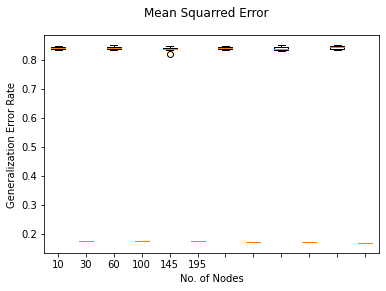

In [ ]:
#2 Graph of No of Nodes vs Accuracy ans MSE of the Model
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
def creating_model1(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #one hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #2 hidden layer used on pca_Embedded dataset
def creating_model2(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))              #two hidden layers
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #3 hidden layer used on pca_Embedded dataset
def creating_model3(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu'))               #three hidden layers
  classifier.add(Dense(20, activation='relu'))               #three hidden layers
  classifier.add(Dense(30, activation='relu'))               #three hidden layers
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier


  #4 hidden layer used on pca_Embedded dataset
def creating_model4(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #four hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #5 hidden layer used on pca_Embedded dataset
def creating_model5(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #five hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  #6 hidden layer used on pca_Embedded dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# prepare models
models = []
models.append(('10', KerasClassifier(build_fn=creating_model1, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('30', KerasClassifier(build_fn=creating_model2, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('60', KerasClassifier(build_fn=creating_model3, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('100', KerasClassifier(build_fn=creating_model4, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('145', KerasClassifier(build_fn=creating_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('195', KerasClassifier(build_fn=creating_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Accuracy Rate')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of Nodes')
plt.ylabel('Generalization Accuracy')
pyplot.show()
print('\n')
print('\n')
# again evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  model.fit(pca_embedded_train_features, Y_train)
  y_pred = model.predict(pca_embedded_test_features)
  mse = mean_squared_error(Y_test,  y_pred)
  results.append(mse)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Squarred Error')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of Nodes')
plt.ylabel('Generalization Error Rate')
pyplot.show()


Epoch 1/6
679/679 [==============================] - 2s 1ms/step - loss: 0.1441 - accuracy: 0.7976
Epoch 2/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1148 - accuracy: 0.8334
Epoch 3/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1137 - accuracy: 0.8333
Epoch 4/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1111 - accuracy: 0.8367
Epoch 5/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1091 - accuracy: 0.8422
Epoch 6/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1095 - accuracy: 0.8395


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/6
679/679 [==============================] - 2s 1ms/step - loss: 0.1578 - accuracy: 0.7806
Epoch 2/6
679/679 [==============================] - 1s 952us/step - loss: 0.1158 - accuracy: 0.8348
Epoch 3/6
679/679 [==============================] - 1s 991us/step - loss: 0.1140 - accuracy: 0.8352
Epoch 4/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1128 - accuracy: 0.8337
Epoch 5/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1105 - accuracy: 0.8402
Epoch 6/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.8419
Epoch 1/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1515 - accuracy: 0.7876
Epoch 2/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1167 - accuracy: 0.8320
Epoch 3/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.8386
Epoch 4/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1121 - accuracy: 0.8377
Epoch 

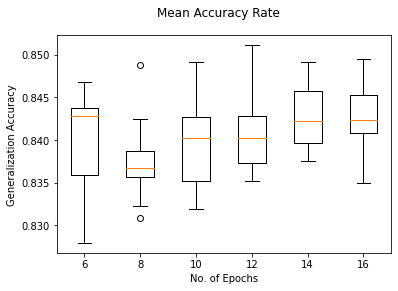





Epoch 1/6
679/679 [==============================] - 2s 1ms/step - loss: 0.1416 - accuracy: 0.7971
Epoch 2/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1124 - accuracy: 0.8381
Epoch 3/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1120 - accuracy: 0.8367
Epoch 4/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1110 - accuracy: 0.8392
Epoch 5/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.8368
Epoch 6/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1082 - accuracy: 0.8420


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/6
679/679 [==============================] - 2s 1ms/step - loss: 0.1509 - accuracy: 0.7859
Epoch 2/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1165 - accuracy: 0.8314
Epoch 3/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1124 - accuracy: 0.8369
Epoch 4/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1097 - accuracy: 0.8417
Epoch 5/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1083 - accuracy: 0.8404
Epoch 6/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1097 - accuracy: 0.8420
Epoch 1/6
679/679 [==============================] - 2s 1ms/step - loss: 0.1432 - accuracy: 0.7941
Epoch 2/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1145 - accuracy: 0.8340
Epoch 3/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.8355
Epoch 4/6
679/679 [==============================] - 1s 1ms/step - loss: 0.1106 - accuracy: 0.8386
Epoch 5/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/8
679/679 [==============================] - 2s 1ms/step - loss: 0.1354 - accuracy: 0.8091
Epoch 2/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1148 - accuracy: 0.8337
Epoch 3/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1129 - accuracy: 0.8357
Epoch 4/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1117 - accuracy: 0.8377
Epoch 5/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1091 - accuracy: 0.8416
Epoch 6/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.8400
Epoch 7/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1089 - accuracy: 0.8415
Epoch 8/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.8429
Epoch 1/8
679/679 [==============================] - 2s 1ms/step - loss: 0.1537 - accuracy: 0.7862
Epoch 2/8
679/679 [==============================] - 1s 1ms/step - loss: 0.1184 - accuracy: 0.8260
Epoch 3/8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1541 - accuracy: 0.7828
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1170 - accuracy: 0.8303
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1145 - accuracy: 0.8336
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1123 - accuracy: 0.8370
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.8308
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.8371
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.8411
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.8391
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1105 - accuracy: 0.8369
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.8414

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1527 - accuracy: 0.7907
Epoch 2/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1157 - accuracy: 0.8321
Epoch 3/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1126 - accuracy: 0.8366
Epoch 4/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1122 - accuracy: 0.8354
Epoch 5/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1105 - accuracy: 0.8355
Epoch 6/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1073 - accuracy: 0.8445
Epoch 7/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.8382
Epoch 8/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1079 - accuracy: 0.8418
Epoch 9/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.8404
Epoch 10/12
679/679 [==============================] - 1s 1ms/step - loss: 0.1072 - accuracy: 0.8423

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/14
679/679 [==============================] - 2s 1ms/step - loss: 0.1488 - accuracy: 0.7897
Epoch 2/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1141 - accuracy: 0.8324
Epoch 3/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1117 - accuracy: 0.8361
Epoch 4/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.8403
Epoch 5/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1094 - accuracy: 0.8396
Epoch 6/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1105 - accuracy: 0.8368
Epoch 7/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1083 - accuracy: 0.8418
Epoch 8/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.8407
Epoch 9/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.8381
Epoch 10/14
679/679 [==============================] - 1s 1ms/step - loss: 0.1067 - accuracy: 0.8451

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/16
679/679 [==============================] - 2s 1ms/step - loss: 0.1469 - accuracy: 0.7973
Epoch 2/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1156 - accuracy: 0.8330
Epoch 3/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1121 - accuracy: 0.8385
Epoch 4/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1135 - accuracy: 0.8345
Epoch 5/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1153 - accuracy: 0.8306
Epoch 6/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1100 - accuracy: 0.8377
Epoch 7/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1120 - accuracy: 0.8366
Epoch 8/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.8370
Epoch 9/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1104 - accuracy: 0.8393
Epoch 10/16
679/679 [==============================] - 1s 1ms/step - loss: 0.1100 - accuracy: 0.8395

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


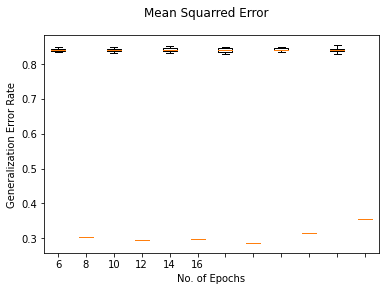

In [ ]:
#3 Graph of No of Epochs for our model  to see Accuracy and MSE of the Model
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 


  #6 hidden layer used on pca_Embedded dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# prepare models, as this model6 is chosen now we will analyse the effect of epochs increase to this model with same batch size
models = []
models.append(('6', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 6, init = 'glorot_uniform', optimizer='WAME')))
models.append(('8', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 8, init = 'glorot_uniform', optimizer='WAME')))
models.append(('10', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 10, init = 'glorot_uniform', optimizer='WAME')))
models.append(('12', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 12, init = 'glorot_uniform', optimizer='WAME')))
models.append(('14', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 14, init = 'glorot_uniform', optimizer='WAME')))
models.append(('16', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 16, init = 'glorot_uniform', optimizer='WAME')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Accuracy Rate')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of Epochs')
plt.ylabel('Generalization Accuracy')
pyplot.show()
print('\n')
print('\n')
# again evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  model.fit(pca_embedded_train_features, Y_train)
  y_pred = model.predict(pca_embedded_test_features)
  mse = mean_squared_error(Y_test,  y_pred)
  results.append(mse)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Squarred Error')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('No. of Epochs')
plt.ylabel('Generalization Error Rate')
pyplot.show()

Epoch 1/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1549 - accuracy: 0.7825
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1173 - accuracy: 0.8311
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.8323
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1106 - accuracy: 0.8399
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.8470
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1072 - accuracy: 0.8447
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1091 - accuracy: 0.8389
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1066 - accuracy: 0.8447
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1075 - accuracy: 0.8433
Epoch 10/10
679/679 [==============================] - 1s 992us/step - loss: 0.1094 - accuracy: 0.84

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 1s 989us/step - loss: 0.1532 - accuracy: 0.7837
Epoch 2/10
679/679 [==============================] - 1s 970us/step - loss: 0.1156 - accuracy: 0.8349
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1133 - accuracy: 0.8362
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.8372
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.8439
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1092 - accuracy: 0.8421
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.8409
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1104 - accuracy: 0.8405
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.8383
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1072 - accuracy: 0.

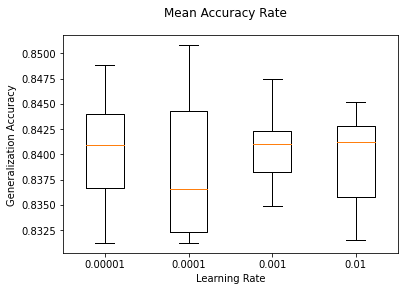





Epoch 1/10
679/679 [==============================] - 2s 1ms/step - loss: 0.1470 - accuracy: 0.7929
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1174 - accuracy: 0.8303
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.8319
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1100 - accuracy: 0.8401
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1112 - accuracy: 0.8348
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.8415
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1085 - accuracy: 0.8401
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1079 - accuracy: 0.8434
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1079 - accuracy: 0.8406
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1086 - accuracy: 0.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 2s 1ms/step - loss: 0.1513 - accuracy: 0.7905
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1123 - accuracy: 0.8386
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1113 - accuracy: 0.8367
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1112 - accuracy: 0.8371
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1105 - accuracy: 0.8415
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1094 - accuracy: 0.8417
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1073 - accuracy: 0.8426
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1084 - accuracy: 0.8415
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1110 - accuracy: 0.8361
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1098 - accuracy: 0.8390

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 2s 1ms/step - loss: 0.1572 - accuracy: 0.7834
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1165 - accuracy: 0.8299
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1127 - accuracy: 0.8365
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1115 - accuracy: 0.8368
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.8408
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.8406
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1117 - accuracy: 0.8382
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.8366
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.8443
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1070 - accuracy: 0.8436

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 2s 1ms/step - loss: 0.1510 - accuracy: 0.7856
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.8362
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1135 - accuracy: 0.8362
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1115 - accuracy: 0.8360
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1124 - accuracy: 0.8376
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1108 - accuracy: 0.8375
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1113 - accuracy: 0.8362
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1095 - accuracy: 0.8419
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1089 - accuracy: 0.8421
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.8404

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1593 - accuracy: 0.7828
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1138 - accuracy: 0.8356
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1135 - accuracy: 0.8335
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1112 - accuracy: 0.8394
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.8415
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1097 - accuracy: 0.8387
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.8357
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1087 - accuracy: 0.8415
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1068 - accuracy: 0.8439
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1093 - accuracy: 0.8413

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


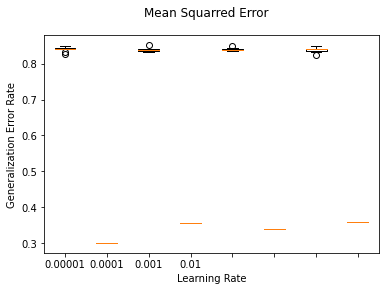

In [ ]:
#4 Graph for learning rates for our  model to see Accuracy and MSE of the Model
# optimizers = ['WAME']
# inits = ['uniform', 'glorot_uniform'] 
#optimizers = ['WAME', 'WAME(learning_rate=0.01)', 'WAME(learning_rate=0.0001)', 'WAME(learning_rate=0.00001)']

  #6 hidden layer used on pca_Embedded dataset
def creating_model6(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

# prepare models, as this model6 is chosen now we will analyse the effect of epochs increase to this model with same batch size
models = []
models.append(('0.00001', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 10, init = 'glorot_uniform', optimizer='WAME(learning_rate=0.00001)')))
models.append(('0.0001', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 10, init = 'glorot_uniform', optimizer='WAME(learning_rate=0.0001)')))
models.append(('0.001', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 10, init = 'glorot_uniform', optimizer='WAME(learning_rate=0.001)')))
models.append(('0.01', KerasClassifier(build_fn=creating_model6, batch_size= 40, epochs= 10, init = 'glorot_uniform', optimizer='WAME(learning_rate=0.01)')))



# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Accuracy Rate')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Learning Rate')
plt.ylabel('Generalization Accuracy')
pyplot.show()
print('\n')
print('\n')
# again evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  model.fit(pca_embedded_train_features, Y_train)
  y_pred = model.predict(pca_embedded_test_features)
  mse = mean_squared_error(Y_test,  y_pred)
  results.append(mse)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Squarred Error')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Learning Rate')
plt.ylabel('Generalization Error Rate')
pyplot.show()

Epoch 1/10
679/679 [==============================] - 2s 988us/step - loss: 0.1459 - accuracy: 0.7929
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1166 - accuracy: 0.8297
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1145 - accuracy: 0.8317
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1098 - accuracy: 0.8382
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1107 - accuracy: 0.8405
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1084 - accuracy: 0.8404
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1094 - accuracy: 0.8395
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1108 - accuracy: 0.8367
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1092 - accuracy: 0.8396
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1063 - accuracy: 0.84

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 2s 1ms/step - loss: 0.1500 - accuracy: 0.7853
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1166 - accuracy: 0.8313
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1123 - accuracy: 0.8367
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.8374
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1111 - accuracy: 0.8397
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1107 - accuracy: 0.8350
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1113 - accuracy: 0.8375
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1099 - accuracy: 0.8367
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1093 - accuracy: 0.8407
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1069 - accuracy: 0.8431

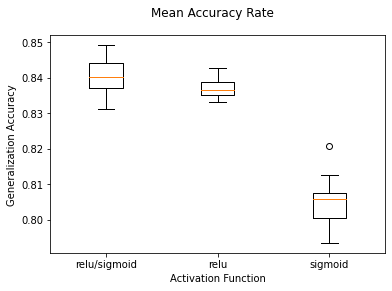





Epoch 1/10
679/679 [==============================] - 1s 996us/step - loss: 0.1517 - accuracy: 0.7833
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1164 - accuracy: 0.8308
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1140 - accuracy: 0.8366
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.8347
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1114 - accuracy: 0.8336
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1106 - accuracy: 0.8372
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.8391
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.8415
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.8383
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1441 - accuracy: 0.7934
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1149 - accuracy: 0.8336
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1124 - accuracy: 0.8385
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1116 - accuracy: 0.8374
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.8373
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1114 - accuracy: 0.8389
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1115 - accuracy: 0.8348
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1082 - accuracy: 0.8414
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1093 - accuracy: 0.8404
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1080 - accuracy: 0.8415

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


679/679 [==============================] - 1s 829us/step - loss: 0.1650 - accuracy: 0.7744
Epoch 2/10
679/679 [==============================] - 1s 848us/step - loss: 0.1217 - accuracy: 0.8242
Epoch 3/10
679/679 [==============================] - 1s 794us/step - loss: 0.1123 - accuracy: 0.8383
Epoch 4/10
679/679 [==============================] - 1s 950us/step - loss: 0.1126 - accuracy: 0.8360
Epoch 5/10
679/679 [==============================] - 1s 868us/step - loss: 0.1103 - accuracy: 0.8391
Epoch 6/10
679/679 [==============================] - 1s 932us/step - loss: 0.1106 - accuracy: 0.8367
Epoch 7/10
679/679 [==============================] - 1s 894us/step - loss: 0.1084 - accuracy: 0.8436
Epoch 8/10
679/679 [==============================] - 1s 878us/step - loss: 0.1100 - accuracy: 0.8378
Epoch 9/10
679/679 [==============================] - 1s 914us/step - loss: 0.1067 - accuracy: 0.8429
Epoch 10/10
679/679 [==============================] - 1s 865us/step - loss: 0.1080 - accurac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 2s 1ms/step - loss: 0.1887 - accuracy: 0.7432
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1859 - accuracy: 0.7538
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1579 - accuracy: 0.7717
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1393 - accuracy: 0.7980
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1396 - accuracy: 0.7993
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1415 - accuracy: 0.7995
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1391 - accuracy: 0.8022
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1408 - accuracy: 0.7980
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1380 - accuracy: 0.8041
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1378 - accuracy: 0.8053

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


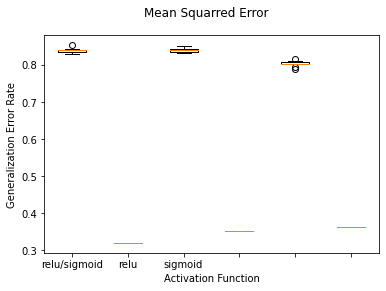

In [ ]:
#5 Graph for Activation for our  model to see Accuracy and MSE of the Model

#6 hidden layer used on pca_Embedded dataset
def creating_model1(optimizer=optimizers, init=inits):# input and hidden uses relu and output layer uses sigmoid
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  def creating_model2(optimizer=optimizers, init=inits):
    classifier = Sequential() #Sequential module Initialises the ANN
    classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
    classifier.add(Dense(10, activation='relu')) 
    classifier.add(Dense(20, activation='relu'))
    classifier.add(Dense(30, activation='relu'))               #six hidden layers
    classifier.add(Dense(40, activation='relu'))
    classifier.add(Dense(45, activation='relu'))
    classifier.add(Dense(50, activation='relu'))
    classifier.add(Dense(1, activation='relu'))             #one output layer
  # Compile model
    classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
    return classifier

def creating_model3(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='sigmoid')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='sigmoid')) 
  classifier.add(Dense(20, activation='sigmoid'))
  classifier.add(Dense(30, activation='sigmoid'))               #six hidden layers
  classifier.add(Dense(40, activation='sigmoid'))
  classifier.add(Dense(45, activation='sigmoid'))
  classifier.add(Dense(50, activation='sigmoid'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier


  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('relu/sigmoid', KerasClassifier(build_fn=creating_model1, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))
models.append(('relu', KerasClassifier(build_fn=creating_model2, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))
models.append(('sigmoid', KerasClassifier(build_fn=creating_model3, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Accuracy Rate')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Activation Function')
plt.ylabel('Generalization Accuracy')
pyplot.show()
print('\n')
print('\n')
# again evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  model.fit(pca_embedded_train_features, Y_train)
  y_pred = model.predict(pca_embedded_test_features)
  mse = mean_squared_error(Y_test,  y_pred)
  results.append(mse)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Mean Squarred Error')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Activation Function')
plt.ylabel('Generalization Error Rate')
pyplot.show()

Analysing the f1 score for 6 hidden layers is better as compared to the rest.
That is why I chose 6 hidden layers for the model **bold text**

In [ ]:
#Analysing the f1 score as per the number of hidden layers
#f1 score for one hidden layer
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
#1 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  #classifier.add(Dense(20, activation='relu'))
  #classifier.add(Dense(30, activation='relu'))               #one hidden layers
  #classifier.add(Dense(40, activation='relu'))
  #classifier.add(Dense(45, activation='relu'))
  #classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 1 HIDDEN LAYER', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')



Model :  ANN WITH 1 HIDDEN LAYER
Epoch 1/10
755/755 [==============================] - 1s 824us/step - loss: 0.1885 - accuracy: 0.7489
Epoch 2/10
755/755 [==============================] - 1s 841us/step - loss: 0.1261 - accuracy: 0.8300
Epoch 3/10
755/755 [==============================] - 1s 859us/step - loss: 0.1192 - accuracy: 0.8311
Epoch 4/10
755/755 [==============================] - 1s 816us/step - loss: 0.1131 - accuracy: 0.8347
Epoch 5/10
755/755 [==============================] - 1s 822us/step - loss: 0.1114 - accuracy: 0.8379
Epoch 6/10
755/755 [==============================] - 1s 875us/step - loss: 0.1117 - accuracy: 0.8383
Epoch 7/10
755/755 [==============================] - 1s 835us/step - loss: 0.1131 - accuracy: 0.8341
Epoch 8/10
755/755 [==============================] - 1s 766us/step - loss: 0.1088 - accuracy: 0.8414
Epoch 9/10
755/755 [==============================] - 1s 787us/step - loss: 0.1101 - accuracy: 0.8390
Epoch 10/10
755/755 [==========================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.2148 


Time elapsed in seconds: 6.9831 


[[9228 2132]
 [2520 1180]]


              precision    recall  f1-score   support

           0       0.79      0.81      0.80     11360
           1       0.36      0.32      0.34      3700

    accuracy                           0.69     15060
   macro avg       0.57      0.57      0.57     15060
weighted avg       0.68      0.69      0.69     15060





In [ ]:
#Analysing the f1 score as per the number of hidden layers
#f1 score for two hidden layer
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
#2 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  #classifier.add(Dense(30, activation='relu'))               #two hidden layers
  #classifier.add(Dense(40, activation='relu'))
  #classifier.add(Dense(45, activation='relu'))
  #classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 1 HIDDEN LAYER', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')



Model :  ANN WITH 1 HIDDEN LAYER
Epoch 1/10
755/755 [==============================] - 1s 827us/step - loss: 0.1631 - accuracy: 0.7797
Epoch 2/10
755/755 [==============================] - 1s 829us/step - loss: 0.1278 - accuracy: 0.8207
Epoch 3/10
755/755 [==============================] - 1s 843us/step - loss: 0.1223 - accuracy: 0.8255
Epoch 4/10
755/755 [==============================] - 1s 833us/step - loss: 0.1201 - accuracy: 0.8281
Epoch 5/10
755/755 [==============================] - 1s 883us/step - loss: 0.1179 - accuracy: 0.8289
Epoch 6/10
755/755 [==============================] - 1s 887us/step - loss: 0.1142 - accuracy: 0.8360
Epoch 7/10
755/755 [==============================] - 1s 845us/step - loss: 0.1135 - accuracy: 0.8348
Epoch 8/10
755/755 [==============================] - 1s 824us/step - loss: 0.1129 - accuracy: 0.8351
Epoch 9/10
755/755 [==============================] - 1s 829us/step - loss: 0.1093 - accuracy: 0.8428
Epoch 10/10
755/755 [==========================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.2358 


Time elapsed in seconds: 7.2101 


[[8725 2635]
 [2289 1411]]


              precision    recall  f1-score   support

           0       0.79      0.77      0.78     11360
           1       0.35      0.38      0.36      3700

    accuracy                           0.67     15060
   macro avg       0.57      0.57      0.57     15060
weighted avg       0.68      0.67      0.68     15060





In [ ]:
#Analysing the f1 score as per the number of hidden layers
#f1 score for three hidden layer
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
#3 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #three hidden layers
  #classifier.add(Dense(40, activation='relu'))
  #classifier.add(Dense(45, activation='relu'))
  #classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 1 HIDDEN LAYER', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')



Model :  ANN WITH 1 HIDDEN LAYER
Epoch 1/10
755/755 [==============================] - 1s 849us/step - loss: 0.1656 - accuracy: 0.7745
Epoch 2/10
755/755 [==============================] - 1s 848us/step - loss: 0.1155 - accuracy: 0.8302
Epoch 3/10
755/755 [==============================] - 1s 864us/step - loss: 0.1128 - accuracy: 0.8353
Epoch 4/10
755/755 [==============================] - 1s 838us/step - loss: 0.1103 - accuracy: 0.8367
Epoch 5/10
755/755 [==============================] - 1s 929us/step - loss: 0.1090 - accuracy: 0.8434
Epoch 6/10
755/755 [==============================] - 1s 889us/step - loss: 0.1113 - accuracy: 0.8374
Epoch 7/10
755/755 [==============================] - 1s 854us/step - loss: 0.1079 - accuracy: 0.8433
Epoch 8/10
755/755 [==============================] - 1s 910us/step - loss: 0.1086 - accuracy: 0.8413
Epoch 9/10
755/755 [==============================] - 1s 908us/step - loss: 0.1091 - accuracy: 0.8390
Epoch 10/10
755/755 [==========================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.2433 


Time elapsed in seconds: 7.5628 


[[9189 2171]
 [2430 1270]]


              precision    recall  f1-score   support

           0       0.79      0.81      0.80     11360
           1       0.37      0.34      0.36      3700

    accuracy                           0.69     15060
   macro avg       0.58      0.58      0.58     15060
weighted avg       0.69      0.69      0.69     15060





In [ ]:
#Analysing the f1 score as per the number of hidden layers
#f1 score for 4 hidden layer
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
#4 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #four hidden layers
  classifier.add(Dense(40, activation='relu'))
  #classifier.add(Dense(45, activation='relu'))
  #classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 1 HIDDEN LAYER', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')



Model :  ANN WITH 1 HIDDEN LAYER
Epoch 1/10
755/755 [==============================] - 1s 881us/step - loss: 0.1580 - accuracy: 0.7828
Epoch 2/10
755/755 [==============================] - 1s 842us/step - loss: 0.1173 - accuracy: 0.8264
Epoch 3/10
755/755 [==============================] - 1s 895us/step - loss: 0.1118 - accuracy: 0.8360
Epoch 4/10
755/755 [==============================] - 1s 837us/step - loss: 0.1102 - accuracy: 0.8388
Epoch 5/10
755/755 [==============================] - 1s 917us/step - loss: 0.1092 - accuracy: 0.8412
Epoch 6/10
755/755 [==============================] - 1s 901us/step - loss: 0.1114 - accuracy: 0.8373
Epoch 7/10
755/755 [==============================] - 1s 912us/step - loss: 0.1077 - accuracy: 0.8443
Epoch 8/10
755/755 [==============================] - 1s 925us/step - loss: 0.1083 - accuracy: 0.8419
Epoch 9/10
755/755 [==============================] - 1s 905us/step - loss: 0.1078 - accuracy: 0.8433
Epoch 10/10
755/755 [==========================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.2362 


Time elapsed in seconds: 7.7570 


[[9940 1420]
 [2767  933]]


              precision    recall  f1-score   support

           0       0.78      0.88      0.83     11360
           1       0.40      0.25      0.31      3700

    accuracy                           0.72     15060
   macro avg       0.59      0.56      0.57     15060
weighted avg       0.69      0.72      0.70     15060





In [ ]:
#Analysing the f1 score as per the number of hidden layers
#f1 score for five hidden layer
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
#5 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #five hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  #classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 1 HIDDEN LAYER', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')



Model :  ANN WITH 1 HIDDEN LAYER
Epoch 1/10
755/755 [==============================] - 2s 959us/step - loss: 0.1452 - accuracy: 0.8004
Epoch 2/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1176 - accuracy: 0.8292
Epoch 3/10
755/755 [==============================] - 1s 929us/step - loss: 0.1145 - accuracy: 0.8345
Epoch 4/10
755/755 [==============================] - 1s 998us/step - loss: 0.1122 - accuracy: 0.8369
Epoch 5/10
755/755 [==============================] - 1s 975us/step - loss: 0.1092 - accuracy: 0.8397
Epoch 6/10
755/755 [==============================] - 1s 967us/step - loss: 0.1085 - accuracy: 0.8416
Epoch 7/10
755/755 [==============================] - 1s 946us/step - loss: 0.1076 - accuracy: 0.8426
Epoch 8/10
755/755 [==============================] - 1s 962us/step - loss: 0.1080 - accuracy: 0.8414
Epoch 9/10
755/755 [==============================] - 1s 933us/step - loss: 0.1063 - accuracy: 0.8433
Epoch 10/10
755/755 [============================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.2389 


Time elapsed in seconds: 8.6962 


[[9786 1574]
 [2760  940]]


              precision    recall  f1-score   support

           0       0.78      0.86      0.82     11360
           1       0.37      0.25      0.30      3700

    accuracy                           0.71     15060
   macro avg       0.58      0.56      0.56     15060
weighted avg       0.68      0.71      0.69     15060





In [ ]:
# #Analysing the f1 score for 6 hidden layers have already done in the evaluation section also and in this section as well which is better as compared to the rest.
#That is why I chose 6 hidden layers for the model
#f1 score for six hidden layer
optimizers = ['WAME']
inits = ['uniform', 'glorot_uniform'] 
#6 hidden layer used on pca_Embedded dataset
def creating_model(optimizer=optimizers, init=inits):
  # this functions creates the model 
  classifier = Sequential() #Sequential module Initialises the ANN
  classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
  classifier.add(Dense(10, activation='relu')) 
  classifier.add(Dense(20, activation='relu'))
  classifier.add(Dense(30, activation='relu'))               #six hidden layers
  classifier.add(Dense(40, activation='relu'))
  classifier.add(Dense(45, activation='relu'))
  classifier.add(Dense(50, activation='relu'))
  classifier.add(Dense(1, activation='sigmoid'))             #one output layer
  # Compile model
  classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return classifier

  # Compile model
#using the best hyperparameter for the model
models = []
models.append(('ANN WITH 1 HIDDEN LAYER', KerasClassifier(build_fn=creating_model, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


for name, model in models:
  print('\n')
  print("Model : ", name)
  model_build_time = time.time()
  model.fit(pca_embedded_train_features, Y_train)
  print('\n')
  print("Time to build ANN Model in seconds : %.4f " % round(time.time()-model_build_time,4))
  print('\n')
  start_time = time.time()
  y_pred = model.predict(pca_embedded_test_features)
  print("Time to test the ANN Model in seconds : %.4f " % round(time.time()-start_time,4))
  print('\n')
  matrix = confusion_matrix(Y_test, y_pred)
  print("Time elapsed in seconds: %.4f " % round(time.time()-model_build_time, 4))
  print('\n')
  print(matrix)
  print('\n')
  report = classification_report(Y_test, y_pred)
  print(report)
  print('\n')



Model :  ANN WITH 1 HIDDEN LAYER
Epoch 1/10
755/755 [==============================] - 2s 983us/step - loss: 0.1529 - accuracy: 0.7805
Epoch 2/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1173 - accuracy: 0.8316
Epoch 3/10
755/755 [==============================] - 1s 988us/step - loss: 0.1118 - accuracy: 0.8399
Epoch 4/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1113 - accuracy: 0.8358
Epoch 5/10
755/755 [==============================] - 1s 972us/step - loss: 0.1075 - accuracy: 0.8447
Epoch 6/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.8393
Epoch 7/10
755/755 [==============================] - 1s 968us/step - loss: 0.1085 - accuracy: 0.8430
Epoch 8/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1115 - accuracy: 0.8375
Epoch 9/10
755/755 [==============================] - 1s 976us/step - loss: 0.1074 - accuracy: 0.8431
Epoch 10/10
755/755 [==============================] - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test the ANN Model in seconds : 0.2748 


Time elapsed in seconds: 8.8078 


[[10165  1195]
 [ 2798   902]]


              precision    recall  f1-score   support

           0       0.78      0.89      0.84     11360
           1       0.43      0.24      0.31      3700

    accuracy                           0.73     15060
   macro avg       0.61      0.57      0.57     15060
weighted avg       0.70      0.73      0.71     15060





Epoch 1/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1462 - accuracy: 0.7975
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1141 - accuracy: 0.8348
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1120 - accuracy: 0.8379
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1111 - accuracy: 0.8366
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1089 - accuracy: 0.8426
Epoch 6/10
679/679 [==============================] - 1s 986us/step - loss: 0.1083 - accuracy: 0.8439
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.8409
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1091 - accuracy: 0.8410
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1068 - accuracy: 0.8423
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1095 - accuracy: 0.83

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1514 - accuracy: 0.7852
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1156 - accuracy: 0.8321
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1145 - accuracy: 0.8330
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1128 - accuracy: 0.8377
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1130 - accuracy: 0.8357
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1109 - accuracy: 0.8386
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1107 - accuracy: 0.8409
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.8388
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1087 - accuracy: 0.8435
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1076 - accuracy: 0.8423

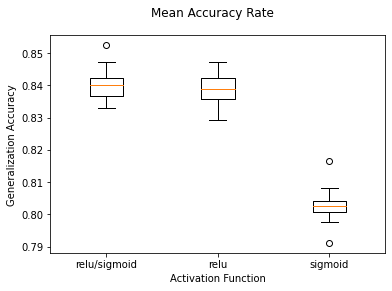

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit() missing 1 required positional argument: 'y'

  FitFailedWarning)


ValueError: ignored

In [ ]:
# #5 Practice to improve the graph of MSE Graph x axis to align for Activation for our  model to see Accuracy and MSE of the Model

# #6 hidden layer used on pca_Embedded dataset
# def creating_model1(optimizer=optimizers, init=inits):# input and hidden uses relu and output layer uses sigmoid
#   # this functions creates the model 
#   classifier = Sequential() #Sequential module Initialises the ANN
#   classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
#   classifier.add(Dense(10, activation='relu')) 
#   classifier.add(Dense(20, activation='relu'))
#   classifier.add(Dense(30, activation='relu'))               #six hidden layers
#   classifier.add(Dense(40, activation='relu'))
#   classifier.add(Dense(45, activation='relu'))
#   classifier.add(Dense(50, activation='relu'))
#   classifier.add(Dense(1, activation='sigmoid'))             #one output layer
#   # Compile model
#   classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
#   return classifier

#   def creating_model2(optimizer=optimizers, init=inits):
#     classifier = Sequential() #Sequential module Initialises the ANN
#     classifier.add(Dense(12, input_dim=6, activation='relu')) # one input layer. Dense module builds the layer for ANN
#     classifier.add(Dense(10, activation='relu')) 
#     classifier.add(Dense(20, activation='relu'))
#     classifier.add(Dense(30, activation='relu'))               #six hidden layers
#     classifier.add(Dense(40, activation='relu'))
#     classifier.add(Dense(45, activation='relu'))
#     classifier.add(Dense(50, activation='relu'))
#     classifier.add(Dense(1, activation='relu'))             #one output layer
#   # Compile model
#     classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
#     return classifier

# def creating_model3(optimizer=optimizers, init=inits):
#   # this functions creates the model 
#   classifier = Sequential() #Sequential module Initialises the ANN
#   classifier.add(Dense(12, input_dim=6, activation='sigmoid')) # one input layer. Dense module builds the layer for ANN
#   classifier.add(Dense(10, activation='sigmoid')) 
#   classifier.add(Dense(20, activation='sigmoid'))
#   classifier.add(Dense(30, activation='sigmoid'))               #six hidden layers
#   classifier.add(Dense(40, activation='sigmoid'))
#   classifier.add(Dense(45, activation='sigmoid'))
#   classifier.add(Dense(50, activation='sigmoid'))
#   classifier.add(Dense(1, activation='sigmoid'))             #one output layer
#   # Compile model
#   classifier.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
#   return classifier


#   # Compile model
# #using the best hyperparameter for the model
# models = []
# models.append(('relu/sigmoid', KerasClassifier(build_fn=creating_model1, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))
# models.append(('relu', KerasClassifier(build_fn=creating_model2, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))
# models.append(('sigmoid', KerasClassifier(build_fn=creating_model3, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME(learning_rate=0.0001)')))


# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#   kfold = KFold(n_splits=10, random_state=7,shuffle=True)
#   cv_results = cross_val_score(model, pca_embedded_train_features, Y_train, cv=kfold, scoring=scoring)
#   results.append(cv_results)
#   names.append(name)
#   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#   print(msg)
# # boxplot algorithm comparison
# fig = pyplot.figure()
# fig.suptitle('Mean Accuracy Rate')
# ax = fig.add_subplot(111)
# pyplot.boxplot(results)
# ax.set_xticklabels(names)
# plt.xlabel('Activation Function')
# plt.ylabel('Generalization Accuracy')
# pyplot.show()
# print('\n')
# print('\n')
# # again evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#   kfold = KFold(n_splits=10, random_state=7,shuffle=True)
#   cv_results = cross_val_score(model, pca_embedded_train_features, cv=kfold, scoring=scoring)
#   #results.append(cv_results)
#   model= tf.stack(model.fit(cv_results, Y_train))
#   #model.fit(pca_embedded_train_features, Y_train)
#   y_pred = model.predict(pca_embedded_test_features)
#   mse = mean_squared_error(Y_test,  y_pred)
#   results.append(mse)
#   names.append(name)
#   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#   print(msg)
# # boxplot algorithm comparison
# fig = pyplot.figure()
# fig.suptitle('Mean Squarred Error')
# ax = fig.add_subplot(111)
# pyplot.boxplot(results)
# ax.set_xticklabels(names)
# plt.xlabel('Activation Function')
# plt.ylabel('Generalization Error Rate')
# pyplot.show()

In [ ]:
#Not needed lamba function to convert the target variable 'class'. As label encoder already assigns more than 50K as 1 and less than 50K as 0 and ignores the dot.
# #Step1c converting the target variable class into 2 groups of zeros and ones. More than 50K as 1 and less than 50 K as 0
# dataset['class'] = dataset['class'].apply(lambda x: str(x).replace('<=50K.', '0') if '<=50K.' in str(x) else str(x))
# dataset['class'] = dataset['class'].apply(lambda x: str(x).replace('<=50K', '0') if '<=50K' in str(x) else str(x))
# dataset['class'] = dataset['class'].apply(lambda x: str(x).replace('>50K.', '1') if '>50K.' in str(x) else str(x))
# dataset['class'] = dataset['class'].apply(lambda x: str(x).replace('>50K', '1') if '>50K' in str(x) else str(x))
# dataset['class'] = dataset['class'].apply(lambda x: int(x))
# dataset
#No need to drop anything now
# #Step1d assigning the target variable to Y and then dropping it from training data
# Y_train = dataset['class']
# dataset.drop('class', axis = 1, inplace = True)
# #Step 1e SELECTING ALL ROWS AND COLUMNS IN X and putting it in Z dataset to visualise
# X_train = dataset.iloc[:, :].values
# Z_train = pd.DataFrame(X_train)
# X_train
# #Step 1f --to do label encoding
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# #for i in range(0, 13):
#  # if isinstance(X[:, i], str):
# X_train[:,1] = labelencoder_X.fit_transform(X_train[:,1])
# X_train[:,3] = labelencoder_X.fit_transform(X_train[:,3])
# X_train[:,5] = labelencoder_X.fit_transform(X_train[:,5])
# X_train[:,6] = labelencoder_X.fit_transform(X_train[:,6])
# X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])
# X_train[:,8] = labelencoder_X.fit_transform(X_train[:,8])
# X_train[:,9] = labelencoder_X.fit_transform(X_train[:,9])
# X_train[:,13] = labelencoder_X.fit_transform(X_train[:,13])
# Z_traindata = pd.DataFrame(X_train)
# Z_traindata#this is the tests data ready for scaling
##-------------------------
#Step 1g the categorical columns are convered to 0s and 1s by using one hot encoder to the 8 categorical columns
# #onehotvector gives a feature for every categorical option. No Need to do Feature extraction and Feature selection when using one hot encoder but Scaling is a must.
# #onehotencoder = OneHotEncoder(categories = [1])
# from sklearn.compose import ColumnTransformer

# ct = ColumnTransformer(
#     [('oh_enc', OneHotEncoder(sparse=False), [1, 3, 5, 6, 7, 8, 9, 13]),],  # the column numbers I want to apply this to
#     remainder='passthrough'  # This leaves the rest of my columns in place
# )
# X_traindata = ct.fit_transform(X_train)
# X_traindata

# #print(ct.fit_transform(X)) # Notice the output is a string
# Z_train = pd.DataFrame(X_traindata)
# Z_train

In [ ]:
# #step 1 h
# #this is just to test step 1 h if this works that means after applying the one hot encoding on the categorical variable we then need to scale all the features to prepare it for the model so that ML algorithm can be applied to it
# #Now Scaling the categorical and the continuous variables by using MinMaxScalar
# from sklearn.preprocessing import MinMaxScaler
# from numpy import set_printoptions
# #rescaled data between 0 and 1
# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledX = scaler.fit_transform(Z_train)
# #summarize transformed data
# set_printoptions(precision=3)
# print(rescaledX)
# M = pd.DataFrame(rescaledX) #M shows that the dataset has been scaled
# M

# #so rescaledX is the final training dataset that I will use

[[0.    0.    0.    ... 0.022 0.    0.398]
 [0.    0.    0.    ... 0.    0.    0.122]
 [0.    0.    0.    ... 0.    0.    0.398]
 ...
 [0.    0.    0.    ... 0.    0.    0.398]
 [0.    0.    0.    ... 0.    0.    0.194]
 [0.    0.    0.    ... 0.15  0.    0.398]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [ ]:
# #Step 1i -- check to see which dataset works Note this dosent work

# # Now dropping the the last six columns from X_traindata as these last 6 columns are continuos data that needs to be scaled so I stored it first in L to scale them and then will combine with X again
# #so dropping the unscaled last 6 col from X
# #dataset.drop('class', axis = 1, inplace = True)
# #all rows, all columns except the last six
# L = X_traindata[:, -6 :]# so L has all the 6 continuous variables
# O = pd.DataFrame(L)# to visualise L that the 6 continuos feature are assigned to L 
# O




,0,1,2,3,4,5
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [ ]:
# #Now dropping the 6 continuous variable from Ztrain --- Note this dosent work

# #X_traindata.drop[:, -6 :]
# Z_train2 = Z_train.drop([102,103,104,105,106,107], axis=1)

# Z_train2 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# #Step 1 j --- Note this dosent work

# #Now Scaling the continuous variables L by using MinMaxScalar
# from sklearn.preprocessing import MinMaxScaler
# from numpy import set_printoptions
# #rescaled data between 0 and 1
# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledX = scaler.fit_transform(L)
# #summarize transformed data
# set_printoptions(precision=3)
# print(rescaledX)
# M = pd.DataFrame(rescaledX) #M shows that L(6 continuous variables)has been scaled
# M


[[0.301 0.044 0.8   0.022 0.    0.398]
 [0.452 0.048 0.8   0.    0.    0.122]
 [0.288 0.138 0.533 0.    0.    0.398]
 ...
 [0.562 0.095 0.533 0.    0.    0.398]
 [0.068 0.128 0.533 0.    0.    0.194]
 [0.479 0.187 0.533 0.15  0.    0.398]]


,0,1,2,3,4,5
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [ ]:
# #Step 1 k Combine the onehotvector Z_train2(8 categorical features) with the rescaledX(6 continuous features) and get the combined dataset for the model
#  #--Note this dosent work

# combined_dataset = np.hstack((Z_train2 , rescaledX))
# combined_dataset.shape # combined_dataset is the final dataset for the train data but fit is failing for this type of dataset
# CD = pd.DataFrame(combined_dataset)
# CD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.30137,0.0443019,0.8,0.0217402,0,0.397959
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.452055,0.0482376,0.8,0,0,0.122449
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.287671,0.138113,0.533333,0,0,0.397959
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.493151,0.151068,0.4,0,0,0.397959
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.150685,0.221488,0.8,0,0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.136986,0.166404,0.733333,0,0,0.377551
32557,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.315068,0.0965003,0.533333,0,0,0.397959
32558,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.561644,0.0948269,0.533333,0,0,0.397959
32559,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0684932,0.128499,0.533333,0,0,0.193878


In [ ]:

# #Buiding neural network
# optimizers = ['WAME1()', 'WAME2()', 'WAME3()', 'WAME4()']#SO WAME IS THE BEST OPTIMISER
# inits = ['uniform', 'glorot_uniform'] 
# epochs = [5, 7, 10]
# batches = [20, 30, 40]


# def create_model(optimizer=optimizers, init=inits):
#   # create model
#   mlp_model = Sequential()
#   mlp_model.add(Dense(12, input_dim=108, activation='relu')) 
#   mlp_model.add(Dense(10, activation='relu')) 
#   mlp_model.add(Dense(20, activation='relu'))
#   mlp_model.add(Dense(30, activation='relu'))
#   mlp_model.add(Dense(1, activation='sigmoid'))

 
#   mlp_model.compile(loss=tf.keras.losses.MeanSquaredError(),  metrics=["accuracy"])
#   return mlp_model

# # create model

# model_keras = KerasClassifier(build_fn=create_model, verbose=0)

# # grid search epochs, batch size and optimizer
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits) 
# grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
# grid_result = grid.fit(Z_train, Y_train)# so i decided after app lying the one hot encoder, do the rescaling of all 108 features and then see if its work
# #print("Best: %f using %s" % (grid_result.bestscore, grid_result.bestparams))
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))#checking the best hyperparameter along with the best optimiser

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

  FitFailedWarning)
/usr/local/lib/python3.7/dist-p

ValueError: ignored

In [ ]:
# #Step 3 part 2 hypertuning the model to see which parameter are best for the neural network model. It took 48 minutes to execute 

# from keras.layers import Dense, Dropout,Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.models import Sequential
# from tensorflow.keras.models import Sequential
# from keras.layers import Dropout
# from keras.layers.core import Activation
# from keras.optimizers import Optimizer
# from sklearn.preprocessing import LabelBinarizer
# from keras.utils import to_categorical 
# from keras import backend as K
# import keras
# from sklearn.model_selection import train_test_split
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
# from sklearn.preprocessing import Normalizer
# from numpy import reshape
# from tensorflow.keras import backend
# from keras.models import Model
# from keras.layers import Dense, Input
# from keras.regularizers import l1 
# from keras.optimizers import Adam
# from keras.losses import kullback_leibler_divergence
# from keras.losses import mean_squared_error
# from keras.models import Sequential 
# from keras.layers import Dropout
# from keras.wrappers.scikit_learn import KerasClassifier 
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from keras.losses import MeanSquaredError
# import tensorflow as tf
# from tensorflow.keras.optimizers import Optimizer, RMSprop

# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# #Buiding neural network
# optimizers = ['WAME1()', 'WAME2()', 'WAME3()', 'WAME4()']#SO WAME IS THE BEST OPTIMISER
# inits = ['uniform', 'glorot_uniform'] 
# epochs = [5, 7, 10]
# batches = [20, 30, 40]


# def create_model(optimizer=optimizers, init=inits):
#   # create model
#   mlp_model = Sequential()
#   mlp_model.add(Dense(12, input_dim=108, activation='relu')) 
#   mlp_model.add(Dense(10, activation='relu')) 
#   mlp_model.add(Dense(20, activation='relu'))
#   mlp_model.add(Dense(30, activation='relu'))
#   mlp_model.add(Dense(1, activation='sigmoid'))

 
#   mlp_model.compile(loss=tf.keras.losses.MeanSquaredError(),  metrics=["accuracy"])
#   return mlp_model

# # create model

# model_keras = KerasClassifier(build_fn=create_model, verbose=0)

# # grid search epochs, batch size and optimizer
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits) 
# grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
# grid_result = grid.fit(rescaledX, Y_train)# so i decided after app lying the one hot encoder, do the rescaling of all 108 features and then see if its work
# #print("Best: %f using %s" % (grid_result.bestscore, grid_result.bestparams))
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))#checking the best hyperparameter along with the best optimiser

Best: 0.852185 using {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME1()'}


In [ ]:
# #Step 3 part2 to visualise the graph of WAME 1 accuracy but there is a problem
# from keras.layers import Dense, Dropout,Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.models import Sequential
# from tensorflow.keras.models import Sequential
# from keras.layers import Dropout
# from keras.layers.core import Activation
# from keras.optimizers import Optimizer
# from sklearn.preprocessing import LabelBinarizer
# from keras.utils import to_categorical 
# from keras import backend as K
# import keras
# from sklearn.model_selection import train_test_split
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
# from sklearn.preprocessing import Normalizer
# from numpy import reshape
# from tensorflow.keras import backend
# from keras.models import Model
# from keras.layers import Dense, Input
# from keras.regularizers import l1 
# from keras.optimizers import Adam
# from keras.losses import kullback_leibler_divergence
# from keras.losses import mean_squared_error
# from keras.models import Sequential 
# from keras.layers import Dropout
# from keras.wrappers.scikit_learn import KerasClassifier 
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from keras.losses import MeanSquaredError
# import tensorflow as tf
# from tensorflow.keras.optimizers import Optimizer, RMSprop

# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# #Buiding neural network
# optimizers = ['WAME1()']#SO WAME IS THE BEST OPTIMISER
# inits = ['uniform', 'glorot_uniform'] 
# epochs = [5, 7, 10]
# batches = [20, 30, 40]


# def create_model(optimizer=optimizers, init=inits):
#   # create model
#   mlp_model = Sequential()
#   mlp_model.add(Dense(12, input_dim=108, activation='relu')) 
#   mlp_model.add(Dense(10, activation='relu')) 
#   mlp_model.add(Dense(20, activation='relu'))
#   mlp_model.add(Dense(30, activation='relu'))
#   mlp_model.add(Dense(1, activation='sigmoid'))

 
#   mlp_model.compile(loss=tf.keras.losses.MeanSquaredError(),  metrics=["accuracy"])
#   return mlp_model

# # create model

# model_keras = KerasClassifier(build_fn=create_model, verbose=0)

# # grid search epochs, batch size and optimizer
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits) 
# grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
# grid_result = grid.fit(rescaledX, Y_train)# so i decided after app lying the one hot encoder, do the rescaling of all 108 features and then see if its work
# #print("Best: %f using %s" % (grid_result.bestscore, grid_result.bestparams))
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# print()

# plt.plot(grid.grid['accuracy'])
# plt.plot(grid.grid['val_accuracy'])
# plt.title("Accuracy of WAME1")
# plt.xlabel('WAME1')
# plt.ylabel('accuracy')
# plt.legend(['train','test'])

# plt.show()

Best: 0.849974 using {'batch_size': 20, 'epochs': 7, 'init': 'glorot_uniform', 'optimizer': 'WAME1()'}



AttributeError: ignored

In [ ]:
# #Step 4a preparing the test data
# import pandas as pd
# names = ('age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class')
# dataset_test = pd.read_csv(filename2, names=names)
# dataset_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
# #Step 4d to visualise B_testdata to see the target variable is dropped
# B_testdata

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


In [ ]:
# #Step 4e SELECTING ALL ROWS AND COLUMNS IN X and putting it in Z dataset to visualise
# X_testdata = B_testdata.iloc[:, :].values
# Z_testdata = pd.DataFrame(X_testdata)
# Z_testdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
# #Step 4g the categorical columns are convered to 0s and 1s by using one hot encoder to the 8 categorical columns
# #onehotvector gives a feature for every categorical option. No Need to do Feature extraction and Feature selection when using one hot encoder but Scaling is a must.
# #onehotencoder = OneHotEncoder(categories = [1])
# from sklearn.compose import ColumnTransformer

# ct = ColumnTransformer(
#     [('oh_enc', OneHotEncoder(sparse=False), [1, 3, 5, 6, 7, 8, 9, 13]),],  # the column numbers I want to apply this to
#     remainder='passthrough'  # This leaves the rest of my columns in place
# )
# X_testdata = ct.fit_transform(X_testdata)
# X_testdata

# #print(ct.fit_transform(X)) # Notice the output is a string
# Z_test = pd.DataFrame(X_testdata)
# Z_test# No idea why the columns is 107 instead of 108

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,25,226802,7,0,0,40
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,89814,9,0,0,50
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,28,336951,12,0,0,40
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,44,160323,10,7688,0,40
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,18,103497,10,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,215419,13,0,0,36
16277,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,64,321403,9,0,0,40
16278,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,374983,13,0,0,50
16279,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,44,83891,13,5455,0,40


In [ ]:
# #step 4 h
# #this is just to test step 1 h if this works that means after applying the one hot encoding on the categorical variable we then need to scale all the features to prepare it for the model so that ML algorithm can be applied to it
# #Now Scaling the categorical and the continuous variables by using MinMaxScalar
# from sklearn.preprocessing import MinMaxScaler
# from numpy import set_printoptions
# #rescaled data between 0 and 1
# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledY = scaler.fit_transform(Z_test)
# #summarize transformed data
# set_printoptions(precision=3)
# print(rescaledY)
# M = pd.DataFrame(rescaledY) #M shows that the dataset has been scaled
# M

# #so rescaledX is the final training dataset that I will use

[[0.    0.    0.    ... 0.    0.    0.398]
 [0.    0.    0.    ... 0.    0.    0.5  ]
 [0.    0.    1.    ... 0.    0.    0.398]
 ...
 [0.    0.    0.    ... 0.    0.    0.5  ]
 [0.    0.    0.    ... 0.055 0.    0.398]
 [0.    0.    0.    ... 0.    0.    0.602]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287671,0.051677,0.533333,0.000000,0.0,0.500000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.150685,0.219011,0.733333,0.000000,0.0,0.397959
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.369863,0.099418,0.600000,0.076881,0.0,0.397959
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.013699,0.060942,0.600000,0.000000,0.0,0.295918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.301370,0.136723,0.800000,0.000000,0.0,0.357143
16277,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.643836,0.208484,0.533333,0.000000,0.0,0.397959
16278,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287671,0.244762,0.800000,0.000000,0.0,0.500000
16279,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.369863,0.047666,0.800000,0.054551,0.0,0.397959


In [ ]:
# #STEP 8 FirstTesting WITHOUT USING wame Best: 0.852185 using {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME1()'}
# from keras.models import Sequential

# from keras.layers import Dense

# inits = ['uniform'] 
# epochs = [10]
# batches = [30]
# #the SEQUENTIAL MODULE IS REQUIRED TO INITIALIZE THE ANN, AND DENSE MODULE IS REQUIRED TO BUILD THE LAYERS OF OUR ANN
#   # create model
# classifier = Sequential()#initialise the ANN by creating an instance of Sequential
# classifier.add(Dense(12, input_dim=14, activation='relu')) 
# classifier.add(Dense(10, activation='relu')) 
# classifier.add(Dense(20, activation='relu'))
# classifier.add(Dense(30, activation='relu'))
# classifier.add(Dense(1, activation='sigmoid'))



# opt = keras.optimizers.Adam(learning_rate=0.0001)

# classifier.compile(optimizer=opt, loss=tf.keras.losses.MeanSquaredError(),  metrics=["accuracy"])

# classifier.fit(rescaledX, Y_train, batch_size=20, epochs=10) #init = 'global_uniform')
# # create model
# y_pred = classifier.predict(rescaledY)
# y_pred = (y_pred > 0.5)
  
# from sklearn.metrics import confusion_matrix#, classification_report
# #cm = confusion_matrix(Y_test, y_pred)

# #model = LogisticRegression(solver='liblinear') model.fit(X_train, Y_train)
# #predicted = model.predict(X_test)
# report = classification_report(Y_test, y_pred) 
# print(report)

# #predicted = model.predict(X_test)
# matrix = confusion_matrix(Y_test, y_pred) 
# print(matrix)


Epoch 1/10


ValueError: ignored